In [14]:
import numpy as np
import matplotlib.pyplot as plt
import gym
from gym import wrappers

from datetime import datetime

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adam

from rl.agents.dqn import DQNAgent
from rl.policy import BoltzmannQPolicy, EpsGreedyQPolicy
from rl.memory import SequentialMemory
from rl.callbacks import Callback
import random

from model import build_model

In [2]:
ENV_NAME = 'LunarLander-v2'

env = gym.make(ENV_NAME)
env = wrappers.Monitor(env, "./monitor")
# To get repeatable results.
sd = 16
np.random.seed(sd)
random.seed(sd)
env.seed(sd)
nb_actions = env.action_space.n

In [3]:
model = build_model(env, nb_actions)
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 8)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 40)                360       
_________________________________________________________________
activation_1 (Activation)    (None, 40)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 40)                1640      
_________________________________________________________________
activation_2 (Activation)    (None, 40)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 164       
_________________________________________________________________
acti

In [4]:
memory = SequentialMemory(limit=500000, window_length=1)
policy = EpsGreedyQPolicy(eps=1.0)

In [5]:
dqn = DQNAgent(model=model, nb_actions=nb_actions, memory=memory, nb_steps_warmup=10,
               target_model_update=1e-2, policy=policy, enable_double_dqn=False)
dqn.compile(Adam(lr=0.002, decay=2.25e-05), metrics=['mse'])

In [7]:
class EpsDecayCallback(Callback):
    def __init__(self, eps_poilcy, decay_rate=0.95):
        self.eps_poilcy = eps_poilcy
        self.decay_rate = decay_rate
    def on_episode_begin(self, episode, logs={}):
        self.eps_poilcy.eps *= self.decay_rate
        print ('eps = %s' % self.eps_poilcy.eps)

cbs = [EpsDecayCallback(eps_poilcy=policy, decay_rate=0.975)]

In [8]:
history = dqn.fit(env, nb_steps=1000000, visualize=True, verbose=2, callbacks=cbs)
dqn.save_weights('monitor/dqn_{}_weights.h5f'.format(ENV_NAME), overwrite=True)

Training for 1000000 steps ...
eps = 0.975
Instructions for updating:
Use tf.cast instead.


/Users/accraze/src/lunar-lander/env/lib/python3.7/site-packages/rl/memory.py:39: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


    105/1000000: episode: 1, duration: 7.880s, episode steps: 105, steps per second: 13, episode reward: -331.236, mean reward: -3.155 [-100.000, 0.696], mean action: 1.533 [0.000, 3.000], mean observation: 0.270 [-1.056, 1.796], loss: 0.995129, mean_squared_error: 2.674137, mean_q: 0.178315
eps = 0.9506249999999999
    215/1000000: episode: 2, duration: 5.412s, episode steps: 110, steps per second: 20, episode reward: -158.845, mean reward: -1.444 [-100.000, 14.979], mean action: 1.500 [0.000, 3.000], mean observation: 0.026 [-5.453, 1.536], loss: 34.108654, mean_squared_error: 23.517929, mean_q: -1.073615
eps = 0.9268593749999999
    276/1000000: episode: 3, duration: 1.118s, episode steps: 61, steps per second: 55, episode reward: -115.475, mean reward: -1.893 [-100.000, 8.990], mean action: 1.820 [0.000, 3.000], mean observation: -0.152 [-1.543, 3.440], loss: 37.426476, mean_squared_error: 26.452980, mean_q: -1.032229
eps = 0.9036878906249999
    390/1000000: episode: 4, duration: 

   2972/1000000: episode: 27, duration: 0.780s, episode steps: 170, steps per second: 218, episode reward: -46.438, mean reward: -0.273 [-100.000, 9.962], mean action: 1.741 [0.000, 3.000], mean observation: -0.014 [-0.624, 1.394], loss: 12.582381, mean_squared_error: 524.112244, mean_q: 2.239274
eps = 0.49218598109595263
   3154/1000000: episode: 28, duration: 7.335s, episode steps: 182, steps per second: 25, episode reward: 34.283, mean reward: 0.188 [-100.000, 12.440], mean action: 1.797 [0.000, 3.000], mean observation: 0.036 [-0.862, 1.429], loss: 11.012659, mean_squared_error: 557.896362, mean_q: 2.305351
eps = 0.4798813315685538
   3256/1000000: episode: 29, duration: 0.593s, episode steps: 102, steps per second: 172, episode reward: -89.647, mean reward: -0.879 [-100.000, 13.285], mean action: 1.892 [0.000, 3.000], mean observation: -0.056 [-1.123, 3.703], loss: 9.112814, mean_squared_error: 580.230713, mean_q: 2.998266
eps = 0.4678842982793399
   3479/1000000: episode: 30, dur

  15332/1000000: episode: 53, duration: 4.527s, episode steps: 1000, steps per second: 221, episode reward: 12.794, mean reward: 0.013 [-20.947, 12.723], mean action: 1.855 [0.000, 3.000], mean observation: 0.041 [-0.449, 1.393], loss: 7.525168, mean_squared_error: 1884.120728, mean_q: 31.455027
eps = 0.2548292333858097
  16332/1000000: episode: 54, duration: 4.583s, episode steps: 1000, steps per second: 218, episode reward: 33.163, mean reward: 0.033 [-24.502, 14.150], mean action: 1.640 [0.000, 3.000], mean observation: 0.110 [-0.484, 1.431], loss: 7.001072, mean_squared_error: 1964.428101, mean_q: 33.796635
eps = 0.24845850255116445
  17332/1000000: episode: 55, duration: 4.364s, episode steps: 1000, steps per second: 229, episode reward: 91.326, mean reward: 0.091 [-20.393, 22.471], mean action: 1.030 [0.000, 3.000], mean observation: 0.178 [-0.543, 1.388], loss: 6.547618, mean_squared_error: 2007.945801, mean_q: 34.802681
eps = 0.24224703998738534
  18332/1000000: episode: 56, du

  37385/1000000: episode: 79, duration: 2.993s, episode steps: 656, steps per second: 219, episode reward: 169.547, mean reward: 0.258 [-4.391, 100.000], mean action: 1.968 [0.000, 3.000], mean observation: 0.057 [-0.493, 1.456], loss: 5.547291, mean_squared_error: 1754.109131, mean_q: 39.315140
eps = 0.13193780538690256
  37974/1000000: episode: 80, duration: 2.656s, episode steps: 589, steps per second: 222, episode reward: 207.475, mean reward: 0.352 [-20.472, 100.000], mean action: 1.480 [0.000, 3.000], mean observation: 0.091 [-0.580, 1.405], loss: 5.817075, mean_squared_error: 1775.448242, mean_q: 40.006905
eps = 0.12863936025223
  38360/1000000: episode: 81, duration: 1.785s, episode steps: 386, steps per second: 216, episode reward: 202.223, mean reward: 0.524 [-9.525, 100.000], mean action: 1.738 [0.000, 3.000], mean observation: 0.062 [-0.534, 1.412], loss: 5.754883, mean_squared_error: 1816.808472, mean_q: 40.579987
eps = 0.12542337624592423
  38744/1000000: episode: 82, dur

  48593/1000000: episode: 105, duration: 2.430s, episode steps: 571, steps per second: 235, episode reward: 228.366, mean reward: 0.400 [-20.952, 100.000], mean action: 1.112 [0.000, 3.000], mean observation: 0.173 [-0.674, 1.391], loss: 6.352733, mean_squared_error: 2282.725098, mean_q: 49.241180
eps = 0.068310783103747
  48895/1000000: episode: 106, duration: 1.301s, episode steps: 302, steps per second: 232, episode reward: 250.271, mean reward: 0.829 [-11.606, 100.000], mean action: 1.586 [0.000, 3.000], mean observation: 0.064 [-0.639, 1.388], loss: 6.140980, mean_squared_error: 2391.326416, mean_q: 50.514530
eps = 0.06660301352615332
  49351/1000000: episode: 107, duration: 2.044s, episode steps: 456, steps per second: 223, episode reward: -158.725, mean reward: -0.348 [-100.000, 20.935], mean action: 1.947 [0.000, 3.000], mean observation: 0.123 [-0.777, 1.559], loss: 6.800637, mean_squared_error: 2354.366211, mean_q: 50.293514
eps = 0.06493793818799948
  49643/1000000: episode:

  58448/1000000: episode: 131, duration: 1.250s, episode steps: 292, steps per second: 234, episode reward: 233.754, mean reward: 0.801 [-9.770, 100.000], mean action: 1.637 [0.000, 3.000], mean observation: 0.088 [-0.596, 1.398], loss: 5.650498, mean_squared_error: 2663.471436, mean_q: 55.127541
eps = 0.035367899856778996
  58812/1000000: episode: 132, duration: 1.617s, episode steps: 364, steps per second: 225, episode reward: 214.859, mean reward: 0.590 [-10.614, 100.000], mean action: 1.734 [0.000, 3.000], mean observation: 0.106 [-0.604, 1.412], loss: 6.427096, mean_squared_error: 2689.659912, mean_q: 55.509518
eps = 0.03448370236035952
  59113/1000000: episode: 133, duration: 1.289s, episode steps: 301, steps per second: 234, episode reward: 241.879, mean reward: 0.804 [-9.025, 100.000], mean action: 1.615 [0.000, 3.000], mean observation: 0.087 [-0.667, 1.477], loss: 7.636988, mean_squared_error: 2726.869141, mean_q: 55.596001
eps = 0.03362160980135053
  59449/1000000: episode: 

  68459/1000000: episode: 157, duration: 1.421s, episode steps: 331, steps per second: 233, episode reward: 268.398, mean reward: 0.811 [-4.509, 100.000], mean action: 1.619 [0.000, 3.000], mean observation: 0.046 [-0.621, 1.415], loss: 8.168722, mean_squared_error: 2742.224121, mean_q: 56.565296
eps = 0.018311725959565726
  68866/1000000: episode: 158, duration: 1.803s, episode steps: 407, steps per second: 226, episode reward: 243.336, mean reward: 0.598 [-9.218, 100.000], mean action: 1.843 [0.000, 3.000], mean observation: 0.092 [-0.572, 1.505], loss: 7.166031, mean_squared_error: 2748.186035, mean_q: 56.966278
eps = 0.017853932810576584
  69222/1000000: episode: 159, duration: 1.523s, episode steps: 356, steps per second: 234, episode reward: 240.840, mean reward: 0.677 [-8.834, 100.000], mean action: 1.615 [0.000, 3.000], mean observation: 0.049 [-0.591, 1.417], loss: 5.873047, mean_squared_error: 2759.885498, mean_q: 56.964634
eps = 0.01740758449031217
  70003/1000000: episode: 

  81912/1000000: episode: 183, duration: 2.207s, episode steps: 463, steps per second: 210, episode reward: 196.363, mean reward: 0.424 [-3.165, 100.000], mean action: 1.616 [0.000, 3.000], mean observation: 0.033 [-0.560, 1.400], loss: 6.967134, mean_squared_error: 2836.457764, mean_q: 58.134903
eps = 0.009480893945529607
  82397/1000000: episode: 184, duration: 2.315s, episode steps: 485, steps per second: 210, episode reward: 244.510, mean reward: 0.504 [-3.154, 100.000], mean action: 1.625 [0.000, 3.000], mean observation: 0.039 [-0.723, 1.472], loss: 5.587420, mean_squared_error: 2849.274414, mean_q: 58.608101
eps = 0.009243871596891367
  82740/1000000: episode: 185, duration: 1.513s, episode steps: 343, steps per second: 227, episode reward: -90.480, mean reward: -0.264 [-100.000, 8.382], mean action: 1.659 [0.000, 3.000], mean observation: 0.012 [-0.853, 1.411], loss: 10.510715, mean_squared_error: 2820.031250, mean_q: 58.031773
eps = 0.009012774806969083
  83286/1000000: episod

  93010/1000000: episode: 209, duration: 1.853s, episode steps: 431, steps per second: 233, episode reward: 215.232, mean reward: 0.499 [-13.028, 100.000], mean action: 1.691 [0.000, 3.000], mean observation: 0.037 [-0.587, 1.391], loss: 8.868960, mean_squared_error: 2989.946533, mean_q: 60.499439
eps = 0.004908731716762305
  93367/1000000: episode: 210, duration: 1.555s, episode steps: 357, steps per second: 230, episode reward: 222.750, mean reward: 0.624 [-3.321, 100.000], mean action: 1.560 [0.000, 3.000], mean observation: 0.066 [-0.514, 1.423], loss: 5.466537, mean_squared_error: 3020.142822, mean_q: 60.700218
eps = 0.004786013423843247
  93649/1000000: episode: 211, duration: 1.256s, episode steps: 282, steps per second: 224, episode reward: 243.668, mean reward: 0.864 [-2.963, 100.000], mean action: 1.638 [0.000, 3.000], mean observation: 0.080 [-0.548, 1.434], loss: 4.348668, mean_squared_error: 3060.910400, mean_q: 61.263935
eps = 0.004666363088247166
  94180/1000000: episode

 103833/1000000: episode: 235, duration: 1.334s, episode steps: 311, steps per second: 233, episode reward: 271.151, mean reward: 0.872 [-3.155, 100.000], mean action: 1.675 [0.000, 3.000], mean observation: 0.057 [-0.594, 1.402], loss: 5.698904, mean_squared_error: 3214.212646, mean_q: 63.176132
eps = 0.002541495264643234
 104204/1000000: episode: 236, duration: 1.633s, episode steps: 371, steps per second: 227, episode reward: 272.307, mean reward: 0.734 [-11.970, 100.000], mean action: 1.563 [0.000, 3.000], mean observation: 0.118 [-0.644, 1.481], loss: 5.432370, mean_squared_error: 3201.245361, mean_q: 62.790462
eps = 0.002477957883027153
 104661/1000000: episode: 237, duration: 2.051s, episode steps: 457, steps per second: 223, episode reward: 237.809, mean reward: 0.520 [-12.526, 100.000], mean action: 1.691 [0.000, 3.000], mean observation: 0.020 [-0.752, 1.398], loss: 8.787728, mean_squared_error: 3202.834961, mean_q: 62.738350
eps = 0.002416008935951474
 104986/1000000: episod

 114982/1000000: episode: 261, duration: 1.253s, episode steps: 275, steps per second: 219, episode reward: 260.223, mean reward: 0.946 [-8.535, 100.000], mean action: 1.698 [0.000, 3.000], mean observation: 0.068 [-0.541, 1.391], loss: 6.382686, mean_squared_error: 3333.934082, mean_q: 63.940411
eps = 0.0013158588720885184
 115478/1000000: episode: 262, duration: 2.183s, episode steps: 496, steps per second: 227, episode reward: 206.436, mean reward: 0.416 [-10.679, 100.000], mean action: 1.613 [0.000, 3.000], mean observation: 0.097 [-0.659, 1.412], loss: 6.256133, mean_squared_error: 3287.813232, mean_q: 63.655991
eps = 0.0012829624002863055
 115841/1000000: episode: 263, duration: 1.631s, episode steps: 363, steps per second: 223, episode reward: 187.615, mean reward: 0.517 [-13.718, 100.000], mean action: 1.689 [0.000, 3.000], mean observation: 0.089 [-0.680, 1.407], loss: 7.486037, mean_squared_error: 3294.787598, mean_q: 63.521667
eps = 0.0012508883402791479
 116105/1000000: epi

 124714/1000000: episode: 287, duration: 1.381s, episode steps: 313, steps per second: 227, episode reward: 212.062, mean reward: 0.678 [-5.957, 100.000], mean action: 1.671 [0.000, 3.000], mean observation: 0.069 [-0.545, 1.411], loss: 7.900617, mean_squared_error: 3306.197998, mean_q: 64.013382
eps = 0.000681285775087654
 125714/1000000: episode: 288, duration: 4.539s, episode steps: 1000, steps per second: 220, episode reward: 104.673, mean reward: 0.105 [-11.616, 11.696], mean action: 1.923 [0.000, 3.000], mean observation: 0.087 [-0.529, 1.445], loss: 5.531579, mean_squared_error: 3304.246582, mean_q: 63.851532
eps = 0.0006642536307104627
 125974/1000000: episode: 289, duration: 1.106s, episode steps: 260, steps per second: 235, episode reward: 294.831, mean reward: 1.134 [-2.674, 100.000], mean action: 1.446 [0.000, 3.000], mean observation: 0.040 [-0.769, 1.424], loss: 6.498675, mean_squared_error: 3328.638672, mean_q: 64.248482
eps = 0.000647647289942701
 126304/1000000: episod

 134765/1000000: episode: 313, duration: 2.325s, episode steps: 568, steps per second: 244, episode reward: 198.238, mean reward: 0.349 [-8.628, 100.000], mean action: 1.428 [0.000, 3.000], mean observation: 0.115 [-0.523, 1.411], loss: 6.206073, mean_squared_error: 3528.220459, mean_q: 66.081505
eps = 0.000352735629315696
 135326/1000000: episode: 314, duration: 2.563s, episode steps: 561, steps per second: 219, episode reward: 214.223, mean reward: 0.382 [-12.509, 100.000], mean action: 2.317 [0.000, 3.000], mean observation: 0.135 [-0.686, 1.484], loss: 6.437961, mean_squared_error: 3494.660156, mean_q: 65.952873
eps = 0.0003439172385828036
 135625/1000000: episode: 315, duration: 1.325s, episode steps: 299, steps per second: 226, episode reward: 257.582, mean reward: 0.861 [-13.169, 100.000], mean action: 1.656 [0.000, 3.000], mean observation: 0.091 [-0.540, 1.393], loss: 3.986184, mean_squared_error: 3524.916016, mean_q: 66.105904
eps = 0.0003353193076182335
 136061/1000000: epis

 144991/1000000: episode: 339, duration: 1.541s, episode steps: 319, steps per second: 207, episode reward: 235.839, mean reward: 0.739 [-14.586, 100.000], mean action: 2.266 [0.000, 3.000], mean observation: 0.146 [-0.722, 1.411], loss: 5.662136, mean_squared_error: 3574.377686, mean_q: 67.013885
eps = 0.00018262883027717985
 145787/1000000: episode: 340, duration: 3.734s, episode steps: 796, steps per second: 213, episode reward: 163.635, mean reward: 0.206 [-12.564, 100.000], mean action: 2.072 [0.000, 3.000], mean observation: 0.077 [-0.455, 1.422], loss: 6.610780, mean_squared_error: 3557.536377, mean_q: 66.813660
eps = 0.00017806310952025035
 146228/1000000: episode: 341, duration: 1.984s, episode steps: 441, steps per second: 222, episode reward: 198.802, mean reward: 0.451 [-8.803, 100.000], mean action: 1.626 [0.000, 3.000], mean observation: 0.030 [-0.553, 1.425], loss: 4.464191, mean_squared_error: 3592.383789, mean_q: 67.025772
eps = 0.00017361153178224408
 146486/1000000: 

 154082/1000000: episode: 365, duration: 1.271s, episode steps: 293, steps per second: 231, episode reward: 238.252, mean reward: 0.813 [-5.647, 100.000], mean action: 1.587 [0.000, 3.000], mean observation: 0.058 [-0.508, 1.397], loss: 5.417338, mean_squared_error: 3611.701416, mean_q: 67.479324
eps = 9.455605523353578e-05
 154374/1000000: episode: 366, duration: 1.307s, episode steps: 292, steps per second: 223, episode reward: 254.212, mean reward: 0.871 [-18.778, 100.000], mean action: 1.473 [0.000, 3.000], mean observation: 0.085 [-0.555, 1.442], loss: 4.359245, mean_squared_error: 3584.969971, mean_q: 67.407326
eps = 9.219215385269739e-05
 154611/1000000: episode: 367, duration: 1.065s, episode steps: 237, steps per second: 223, episode reward: 274.582, mean reward: 1.159 [-13.537, 100.000], mean action: 1.819 [0.000, 3.000], mean observation: 0.047 [-0.721, 1.396], loss: 5.222502, mean_squared_error: 3649.105225, mean_q: 67.722771
eps = 8.988735000637995e-05
 154922/1000000: epi

 164143/1000000: episode: 391, duration: 1.120s, episode steps: 255, steps per second: 228, episode reward: 231.706, mean reward: 0.909 [-11.019, 100.000], mean action: 1.631 [0.000, 3.000], mean observation: 0.093 [-0.517, 1.427], loss: 3.416097, mean_squared_error: 3576.849609, mean_q: 67.173195
eps = 4.895638639177477e-05
 164421/1000000: episode: 392, duration: 1.222s, episode steps: 278, steps per second: 228, episode reward: 282.498, mean reward: 1.016 [-5.682, 100.000], mean action: 1.594 [0.000, 3.000], mean observation: 0.045 [-0.662, 1.411], loss: 4.044849, mean_squared_error: 3566.846191, mean_q: 67.262062
eps = 4.77324767319804e-05
 165421/1000000: episode: 393, duration: 3.921s, episode steps: 1000, steps per second: 255, episode reward: 126.181, mean reward: 0.126 [-9.436, 12.603], mean action: 0.642 [0.000, 3.000], mean observation: 0.210 [-0.568, 1.403], loss: 5.112694, mean_squared_error: 3622.337402, mean_q: 67.494339
eps = 4.653916481368089e-05
 165685/1000000: episo

 176849/1000000: episode: 417, duration: 1.125s, episode steps: 253, steps per second: 225, episode reward: 233.107, mean reward: 0.921 [-2.861, 100.000], mean action: 1.621 [0.000, 3.000], mean observation: 0.085 [-0.531, 1.420], loss: 6.948009, mean_squared_error: 3535.632080, mean_q: 66.636574
eps = 2.5347163252752882e-05
 177085/1000000: episode: 418, duration: 1.186s, episode steps: 236, steps per second: 199, episode reward: 305.117, mean reward: 1.293 [-11.245, 100.000], mean action: 1.521 [0.000, 3.000], mean observation: 0.099 [-0.733, 1.386], loss: 2.810311, mean_squared_error: 3542.940186, mean_q: 67.013512
eps = 2.471348417143406e-05
 177525/1000000: episode: 419, duration: 1.850s, episode steps: 440, steps per second: 238, episode reward: 261.363, mean reward: 0.594 [-10.773, 100.000], mean action: 1.230 [0.000, 3.000], mean observation: 0.104 [-0.734, 1.414], loss: 4.713260, mean_squared_error: 3593.656006, mean_q: 67.218193
eps = 2.4095647067148207e-05
 177762/1000000: e

 187040/1000000: episode: 443, duration: 1.300s, episode steps: 292, steps per second: 225, episode reward: 241.801, mean reward: 0.828 [-9.760, 100.000], mean action: 1.620 [0.000, 3.000], mean observation: 0.073 [-0.568, 1.393], loss: 4.364395, mean_squared_error: 3481.611084, mean_q: 66.211021
eps = 1.3123490770341043e-05
 187399/1000000: episode: 444, duration: 1.544s, episode steps: 359, steps per second: 233, episode reward: 257.866, mean reward: 0.718 [-7.901, 100.000], mean action: 1.429 [0.000, 3.000], mean observation: 0.063 [-0.500, 1.406], loss: 4.756314, mean_squared_error: 3458.647705, mean_q: 66.022881
eps = 1.2795403501082516e-05
 187792/1000000: episode: 445, duration: 1.671s, episode steps: 393, steps per second: 235, episode reward: 266.060, mean reward: 0.677 [-8.689, 100.000], mean action: 1.366 [0.000, 3.000], mean observation: 0.045 [-0.607, 1.391], loss: 4.854223, mean_squared_error: 3510.524414, mean_q: 66.390862
eps = 1.2475518413555453e-05
 188060/1000000: ep

 196675/1000000: episode: 469, duration: 1.141s, episode steps: 270, steps per second: 237, episode reward: 285.575, mean reward: 1.058 [-2.784, 100.000], mean action: 1.422 [0.000, 3.000], mean observation: 0.058 [-0.643, 1.410], loss: 3.574475, mean_squared_error: 3438.860840, mean_q: 65.649391
eps = 6.794685791141599e-06
 196970/1000000: episode: 470, duration: 1.295s, episode steps: 295, steps per second: 228, episode reward: 255.131, mean reward: 0.865 [-3.087, 100.000], mean action: 1.664 [0.000, 3.000], mean observation: 0.075 [-0.591, 1.477], loss: 5.905963, mean_squared_error: 3426.814453, mean_q: 65.703140
eps = 6.624818646363058e-06
 197297/1000000: episode: 471, duration: 1.398s, episode steps: 327, steps per second: 234, episode reward: 279.198, mean reward: 0.854 [-3.242, 100.000], mean action: 1.486 [0.000, 3.000], mean observation: 0.112 [-0.735, 1.397], loss: 6.633777, mean_squared_error: 3439.443359, mean_q: 65.873512
eps = 6.459198180203982e-06
 197867/1000000: episo

 207708/1000000: episode: 495, duration: 1.289s, episode steps: 290, steps per second: 225, episode reward: 229.173, mean reward: 0.790 [-12.034, 100.000], mean action: 1.638 [0.000, 3.000], mean observation: 0.089 [-0.830, 1.405], loss: 3.869274, mean_squared_error: 3613.818848, mean_q: 67.750717
eps = 3.5179477631576667e-06
 207951/1000000: episode: 496, duration: 1.079s, episode steps: 243, steps per second: 225, episode reward: 258.064, mean reward: 1.062 [-2.803, 100.000], mean action: 1.576 [0.000, 3.000], mean observation: 0.078 [-0.760, 1.470], loss: 5.505349, mean_squared_error: 3657.049316, mean_q: 68.081909
eps = 3.429999069078725e-06
 208211/1000000: episode: 497, duration: 1.160s, episode steps: 260, steps per second: 224, episode reward: 262.216, mean reward: 1.009 [-11.499, 100.000], mean action: 1.538 [0.000, 3.000], mean observation: 0.055 [-0.515, 1.392], loss: 6.530213, mean_squared_error: 3651.958252, mean_q: 67.738983
eps = 3.344249092351757e-06
 208416/1000000: ep

 215816/1000000: episode: 521, duration: 1.191s, episode steps: 273, steps per second: 229, episode reward: 289.574, mean reward: 1.061 [-3.644, 100.000], mean action: 1.553 [0.000, 3.000], mean observation: 0.096 [-0.748, 1.407], loss: 6.386521, mean_squared_error: 3717.110596, mean_q: 68.812431
eps = 1.8214170374796247e-06
 216121/1000000: episode: 522, duration: 1.337s, episode steps: 305, steps per second: 228, episode reward: 284.874, mean reward: 0.934 [-3.512, 100.000], mean action: 1.416 [0.000, 3.000], mean observation: 0.115 [-0.567, 1.522], loss: 3.892174, mean_squared_error: 3720.458984, mean_q: 68.971642
eps = 1.775881611542634e-06
 216385/1000000: episode: 523, duration: 1.214s, episode steps: 264, steps per second: 218, episode reward: 283.715, mean reward: 1.075 [-3.311, 100.000], mean action: 1.538 [0.000, 3.000], mean observation: 0.054 [-0.603, 1.413], loss: 5.154588, mean_squared_error: 3738.431396, mean_q: 69.087387
eps = 1.731484571254068e-06
 216635/1000000: epis

 224444/1000000: episode: 547, duration: 4.482s, episode steps: 1000, steps per second: 223, episode reward: 164.146, mean reward: 0.164 [-9.542, 14.710], mean action: 1.555 [0.000, 3.000], mean observation: 0.099 [-0.735, 1.391], loss: 5.837802, mean_squared_error: 3637.553467, mean_q: 68.043251
eps = 9.430384553076057e-07
 224758/1000000: episode: 548, duration: 1.323s, episode steps: 314, steps per second: 237, episode reward: 294.001, mean reward: 0.936 [-6.924, 100.000], mean action: 1.481 [0.000, 3.000], mean observation: 0.070 [-0.659, 1.520], loss: 3.496780, mean_squared_error: 3596.073242, mean_q: 67.666840
eps = 9.194624939249156e-07
 225112/1000000: episode: 549, duration: 1.609s, episode steps: 354, steps per second: 220, episode reward: 247.388, mean reward: 0.699 [-6.726, 100.000], mean action: 1.664 [0.000, 3.000], mean observation: 0.053 [-0.514, 1.398], loss: 4.557343, mean_squared_error: 3618.075684, mean_q: 67.939888
eps = 8.964759315767926e-07
 225356/1000000: episo

 232781/1000000: episode: 573, duration: 0.969s, episode steps: 223, steps per second: 230, episode reward: 235.134, mean reward: 1.054 [-3.154, 100.000], mean action: 1.587 [0.000, 3.000], mean observation: 0.061 [-0.739, 1.404], loss: 3.493460, mean_squared_error: 3670.077637, mean_q: 68.536682
eps = 4.882580484805106e-07
 233100/1000000: episode: 574, duration: 1.402s, episode steps: 319, steps per second: 228, episode reward: 250.418, mean reward: 0.785 [-3.433, 100.000], mean action: 1.683 [0.000, 3.000], mean observation: 0.051 [-0.488, 1.404], loss: 3.753510, mean_squared_error: 3663.457764, mean_q: 68.512344
eps = 4.760515972684978e-07
 233362/1000000: episode: 575, duration: 1.141s, episode steps: 262, steps per second: 230, episode reward: 221.546, mean reward: 0.846 [-3.481, 100.000], mean action: 1.603 [0.000, 3.000], mean observation: 0.054 [-0.685, 1.412], loss: 5.812199, mean_squared_error: 3640.689453, mean_q: 68.287674
eps = 4.6415030733678537e-07
 233759/1000000: epis

 241443/1000000: episode: 599, duration: 1.272s, episode steps: 300, steps per second: 236, episode reward: 263.361, mean reward: 0.878 [-3.792, 100.000], mean action: 1.547 [0.000, 3.000], mean observation: 0.097 [-0.636, 1.421], loss: 6.028770, mean_squared_error: 3525.076660, mean_q: 66.863884
eps = 2.527955467396453e-07
 241906/1000000: episode: 600, duration: 1.960s, episode steps: 463, steps per second: 236, episode reward: 268.715, mean reward: 0.580 [-3.697, 100.000], mean action: 1.557 [0.000, 3.000], mean observation: 0.045 [-0.695, 1.386], loss: 6.350816, mean_squared_error: 3516.698730, mean_q: 66.787811
eps = 2.4647565807115415e-07
 242161/1000000: episode: 601, duration: 1.094s, episode steps: 255, steps per second: 233, episode reward: 306.837, mean reward: 1.203 [-2.878, 100.000], mean action: 1.667 [0.000, 3.000], mean observation: 0.052 [-0.722, 1.385], loss: 6.768138, mean_squared_error: 3548.119141, mean_q: 66.995293
eps = 2.403137666193753e-07
 242428/1000000: epis

 251199/1000000: episode: 625, duration: 2.052s, episode steps: 442, steps per second: 215, episode reward: 230.818, mean reward: 0.522 [-9.975, 100.000], mean action: 1.559 [0.000, 3.000], mean observation: 0.026 [-0.654, 1.406], loss: 5.739210, mean_squared_error: 3645.633545, mean_q: 68.133247
eps = 1.308848643668535e-07
 251485/1000000: episode: 626, duration: 1.408s, episode steps: 286, steps per second: 203, episode reward: 274.371, mean reward: 0.959 [-9.506, 100.000], mean action: 1.535 [0.000, 3.000], mean observation: 0.106 [-0.680, 1.460], loss: 4.465644, mean_squared_error: 3602.511719, mean_q: 67.693634
eps = 1.2761274275768215e-07
 251723/1000000: episode: 627, duration: 1.159s, episode steps: 238, steps per second: 205, episode reward: 291.766, mean reward: 1.226 [-9.550, 100.000], mean action: 1.496 [0.000, 3.000], mean observation: 0.103 [-0.761, 1.387], loss: 3.539521, mean_squared_error: 3644.110352, mean_q: 68.151291
eps = 1.244224241887401e-07
 252006/1000000: epis

 260328/1000000: episode: 651, duration: 1.103s, episode steps: 242, steps per second: 219, episode reward: 273.310, mean reward: 1.129 [-9.238, 100.000], mean action: 1.331 [0.000, 3.000], mean observation: 0.066 [-0.825, 1.388], loss: 4.421127, mean_squared_error: 3747.678955, mean_q: 68.872742
eps = 6.776562301539563e-08
 260590/1000000: episode: 652, duration: 1.236s, episode steps: 262, steps per second: 212, episode reward: 245.153, mean reward: 0.936 [-9.160, 100.000], mean action: 1.615 [0.000, 3.000], mean observation: 0.079 [-0.955, 1.409], loss: 3.657596, mean_squared_error: 3742.589111, mean_q: 68.835701
eps = 6.607148244001073e-08
 260840/1000000: episode: 653, duration: 1.201s, episode steps: 250, steps per second: 208, episode reward: 269.826, mean reward: 1.079 [-10.271, 100.000], mean action: 1.616 [0.000, 3.000], mean observation: 0.061 [-0.968, 1.498], loss: 3.370579, mean_squared_error: 3729.808350, mean_q: 68.874535
eps = 6.441969537901046e-08
 261061/1000000: epis

 268345/1000000: episode: 677, duration: 1.506s, episode steps: 347, steps per second: 230, episode reward: 249.134, mean reward: 0.718 [-8.998, 100.000], mean action: 1.527 [0.000, 3.000], mean observation: 0.051 [-0.606, 1.400], loss: 3.989100, mean_squared_error: 3683.556885, mean_q: 68.515938
eps = 3.50856432856394e-08
 268664/1000000: episode: 678, duration: 1.380s, episode steps: 319, steps per second: 231, episode reward: 245.831, mean reward: 0.771 [-3.438, 100.000], mean action: 1.520 [0.000, 3.000], mean observation: 0.066 [-0.443, 1.462], loss: 5.640622, mean_squared_error: 3702.231934, mean_q: 68.725243
eps = 3.4208502203498414e-08
 268940/1000000: episode: 679, duration: 1.190s, episode steps: 276, steps per second: 232, episode reward: 281.595, mean reward: 1.020 [-5.753, 100.000], mean action: 1.464 [0.000, 3.000], mean observation: 0.074 [-0.647, 1.386], loss: 6.867599, mean_squared_error: 3676.017822, mean_q: 68.483101
eps = 3.335328964841095e-08
 269940/1000000: episo

 277243/1000000: episode: 703, duration: 1.550s, episode steps: 308, steps per second: 199, episode reward: 217.795, mean reward: 0.707 [-12.421, 100.000], mean action: 1.487 [0.000, 3.000], mean observation: 0.102 [-0.995, 1.473], loss: 5.363653, mean_squared_error: 3715.597412, mean_q: 68.820847
eps = 1.816558765330709e-08
 278086/1000000: episode: 704, duration: 3.615s, episode steps: 843, steps per second: 233, episode reward: 283.150, mean reward: 0.336 [-10.358, 100.000], mean action: 1.176 [0.000, 3.000], mean observation: 0.189 [-0.885, 1.497], loss: 5.131223, mean_squared_error: 3698.648926, mean_q: 68.641449
eps = 1.771144796197441e-08
 278523/1000000: episode: 705, duration: 2.192s, episode steps: 437, steps per second: 199, episode reward: 238.586, mean reward: 0.546 [-8.078, 100.000], mean action: 1.785 [0.000, 3.000], mean observation: 0.041 [-0.533, 1.451], loss: 3.569919, mean_squared_error: 3712.437988, mean_q: 68.786232
eps = 1.726866176292505e-08
 278718/1000000: epi

 286949/1000000: episode: 729, duration: 1.399s, episode steps: 253, steps per second: 181, episode reward: 287.182, mean reward: 1.135 [-3.307, 100.000], mean action: 1.498 [0.000, 3.000], mean observation: 0.085 [-0.673, 1.396], loss: 3.418263, mean_squared_error: 3792.529541, mean_q: 69.516830
eps = 9.40523085478235e-09
 287236/1000000: episode: 730, duration: 10.577s, episode steps: 287, steps per second: 27, episode reward: 249.966, mean reward: 0.871 [-8.315, 100.000], mean action: 1.533 [0.000, 3.000], mean observation: 0.078 [-0.650, 1.391], loss: 3.283884, mean_squared_error: 3805.527100, mean_q: 69.823746
eps = 9.170100083412791e-09
 287569/1000000: episode: 731, duration: 1.598s, episode steps: 333, steps per second: 208, episode reward: 218.740, mean reward: 0.657 [-2.968, 100.000], mean action: 1.502 [0.000, 3.000], mean observation: 0.098 [-0.602, 1.412], loss: 5.256908, mean_squared_error: 3811.755371, mean_q: 69.720390
eps = 8.940847581327471e-09
 287819/1000000: episod

 295209/1000000: episode: 755, duration: 1.366s, episode steps: 308, steps per second: 225, episode reward: 223.938, mean reward: 0.727 [-9.662, 100.000], mean action: 1.442 [0.000, 3.000], mean observation: 0.070 [-0.708, 1.417], loss: 5.555319, mean_squared_error: 3772.400146, mean_q: 69.494179
eps = 4.869557160494386e-09
 295466/1000000: episode: 756, duration: 1.138s, episode steps: 257, steps per second: 226, episode reward: 302.618, mean reward: 1.178 [-3.076, 100.000], mean action: 1.486 [0.000, 3.000], mean observation: 0.091 [-0.727, 1.457], loss: 4.440498, mean_squared_error: 3772.667969, mean_q: 69.483055
eps = 4.7478182314820264e-09
 295784/1000000: episode: 757, duration: 1.514s, episode steps: 318, steps per second: 210, episode reward: 265.916, mean reward: 0.836 [-3.673, 100.000], mean action: 1.601 [0.000, 3.000], mean observation: 0.040 [-0.590, 1.435], loss: 4.824126, mean_squared_error: 3743.593506, mean_q: 69.131386
eps = 4.629122775694976e-09
 296026/1000000: epis

 302798/1000000: episode: 781, duration: 1.255s, episode steps: 265, steps per second: 211, episode reward: 293.243, mean reward: 1.107 [-5.539, 100.000], mean action: 1.355 [0.000, 3.000], mean observation: 0.103 [-0.647, 1.462], loss: 3.596457, mean_squared_error: 3801.949951, mean_q: 69.669548
eps = 2.5212126427779107e-09
 303085/1000000: episode: 782, duration: 1.529s, episode steps: 287, steps per second: 188, episode reward: 231.793, mean reward: 0.808 [-8.765, 100.000], mean action: 1.603 [0.000, 3.000], mean observation: 0.082 [-0.665, 1.403], loss: 3.612880, mean_squared_error: 3807.324463, mean_q: 69.785851
eps = 2.4581823267084628e-09
 303363/1000000: episode: 783, duration: 1.372s, episode steps: 278, steps per second: 203, episode reward: 248.514, mean reward: 0.894 [-9.461, 100.000], mean action: 1.691 [0.000, 3.000], mean observation: 0.079 [-0.672, 1.398], loss: 5.014541, mean_squared_error: 3782.151123, mean_q: 69.798912
eps = 2.3967277685407513e-09
 303618/1000000: ep

 311538/1000000: episode: 807, duration: 1.280s, episode steps: 285, steps per second: 223, episode reward: 245.300, mean reward: 0.861 [-2.896, 100.000], mean action: 1.554 [0.000, 3.000], mean observation: 0.068 [-0.407, 1.413], loss: 4.330038, mean_squared_error: 3695.005371, mean_q: 68.783699
eps = 1.3053575470213443e-09
 311831/1000000: episode: 808, duration: 2.224s, episode steps: 293, steps per second: 132, episode reward: 236.847, mean reward: 0.808 [-3.988, 100.000], mean action: 1.594 [0.000, 3.000], mean observation: 0.072 [-0.499, 1.431], loss: 4.385559, mean_squared_error: 3684.561768, mean_q: 68.608719
eps = 1.2727236083458107e-09
 312117/1000000: episode: 809, duration: 1.400s, episode steps: 286, steps per second: 204, episode reward: 289.855, mean reward: 1.013 [-2.747, 100.000], mean action: 1.650 [0.000, 3.000], mean observation: 0.057 [-0.736, 1.426], loss: 6.486131, mean_squared_error: 3738.222412, mean_q: 68.889160
eps = 1.2409055181371654e-09
 312418/1000000: ep

 320289/1000000: episode: 833, duration: 1.393s, episode steps: 291, steps per second: 209, episode reward: 284.222, mean reward: 0.977 [-12.085, 100.000], mean action: 1.646 [0.000, 3.000], mean observation: 0.042 [-0.757, 1.399], loss: 3.554592, mean_squared_error: 3779.465088, mean_q: 69.326462
eps = 6.758487152785866e-10
 320580/1000000: episode: 834, duration: 1.367s, episode steps: 291, steps per second: 213, episode reward: 254.585, mean reward: 0.875 [-9.931, 100.000], mean action: 1.454 [0.000, 3.000], mean observation: 0.074 [-0.461, 1.471], loss: 4.149574, mean_squared_error: 3778.641846, mean_q: 69.396446
eps = 6.58952497396622e-10
 321151/1000000: episode: 835, duration: 2.579s, episode steps: 571, steps per second: 221, episode reward: 226.037, mean reward: 0.396 [-7.309, 100.000], mean action: 1.060 [0.000, 3.000], mean observation: 0.168 [-0.630, 1.392], loss: 4.525596, mean_squared_error: 3781.660156, mean_q: 69.417778
eps = 6.424786849617064e-10
 321441/1000000: episo

 329299/1000000: episode: 859, duration: 2.774s, episode steps: 565, steps per second: 204, episode reward: 266.724, mean reward: 0.472 [-9.781, 100.000], mean action: 1.940 [0.000, 3.000], mean observation: 0.073 [-0.681, 1.387], loss: 4.119949, mean_squared_error: 3767.124756, mean_q: 69.457077
eps = 3.499205922438713e-10
 329581/1000000: episode: 860, duration: 1.416s, episode steps: 282, steps per second: 199, episode reward: 281.646, mean reward: 0.999 [-12.362, 100.000], mean action: 1.674 [0.000, 3.000], mean observation: 0.054 [-0.655, 1.400], loss: 4.304496, mean_squared_error: 3717.702393, mean_q: 68.851036
eps = 3.411725774377745e-10
 329815/1000000: episode: 861, duration: 2.350s, episode steps: 234, steps per second: 100, episode reward: 285.394, mean reward: 1.220 [-9.726, 100.000], mean action: 1.355 [0.000, 3.000], mean observation: 0.099 [-0.630, 1.412], loss: 3.488925, mean_squared_error: 3779.833984, mean_q: 69.495491
eps = 3.326432630018301e-10
 330168/1000000: epis

 338017/1000000: episode: 885, duration: 1.255s, episode steps: 265, steps per second: 211, episode reward: 225.560, mean reward: 0.851 [-9.852, 100.000], mean action: 1.592 [0.000, 3.000], mean observation: 0.073 [-0.551, 1.411], loss: 3.980451, mean_squared_error: 3780.263184, mean_q: 69.356880
eps = 1.811713451668393e-10
 338289/1000000: episode: 886, duration: 1.371s, episode steps: 272, steps per second: 198, episode reward: 282.383, mean reward: 1.038 [-8.346, 100.000], mean action: 1.463 [0.000, 3.000], mean observation: 0.061 [-0.587, 1.416], loss: 5.413822, mean_squared_error: 3773.123535, mean_q: 69.221741
eps = 1.7664206153766832e-10
 338672/1000000: episode: 887, duration: 1.928s, episode steps: 383, steps per second: 199, episode reward: 235.031, mean reward: 0.614 [-11.995, 100.000], mean action: 1.389 [0.000, 3.000], mean observation: 0.087 [-0.521, 1.507], loss: 4.591300, mean_squared_error: 3801.581543, mean_q: 69.465187
eps = 1.722260099992266e-10
 338978/1000000: epi

 347013/1000000: episode: 911, duration: 1.592s, episode steps: 327, steps per second: 205, episode reward: 247.460, mean reward: 0.757 [-8.884, 100.000], mean action: 1.722 [0.000, 3.000], mean observation: 0.058 [-0.555, 1.412], loss: 4.382608, mean_squared_error: 4040.320312, mean_q: 71.684052
eps = 9.380144249037662e-11
 347347/1000000: episode: 912, duration: 1.647s, episode steps: 334, steps per second: 203, episode reward: 256.178, mean reward: 0.767 [-10.067, 100.000], mean action: 1.497 [0.000, 3.000], mean observation: 0.108 [-0.798, 1.517], loss: 4.886007, mean_squared_error: 3977.461426, mean_q: 71.224739
eps = 9.145640642811721e-11
 347605/1000000: episode: 913, duration: 1.258s, episode steps: 258, steps per second: 205, episode reward: 281.987, mean reward: 1.093 [-3.790, 100.000], mean action: 1.221 [0.000, 3.000], mean observation: 0.095 [-0.566, 1.458], loss: 4.579664, mean_squared_error: 4031.780029, mean_q: 71.447350
eps = 8.916999626741427e-11
 347903/1000000: epis

 354974/1000000: episode: 937, duration: 1.521s, episode steps: 310, steps per second: 204, episode reward: -16.039, mean reward: -0.052 [-100.000, 6.667], mean action: 1.729 [0.000, 3.000], mean observation: 0.097 [-0.714, 1.387], loss: 4.191586, mean_squared_error: 3988.797607, mean_q: 71.189140
eps = 4.856568573342971e-11
 355287/1000000: episode: 938, duration: 1.503s, episode steps: 313, steps per second: 208, episode reward: 276.023, mean reward: 0.882 [-2.903, 100.000], mean action: 1.553 [0.000, 3.000], mean observation: 0.063 [-0.502, 1.487], loss: 5.670498, mean_squared_error: 3978.180420, mean_q: 71.101639
eps = 4.7351543590093965e-11
 355502/1000000: episode: 939, duration: 0.970s, episode steps: 215, steps per second: 222, episode reward: 314.656, mean reward: 1.464 [-10.008, 100.000], mean action: 1.419 [0.000, 3.000], mean observation: 0.095 [-0.779, 1.387], loss: 4.240101, mean_squared_error: 4019.601074, mean_q: 71.429573
eps = 4.6167755000341616e-11
 355807/1000000: e

 364331/1000000: episode: 963, duration: 1.344s, episode steps: 256, steps per second: 191, episode reward: 273.181, mean reward: 1.067 [-6.040, 100.000], mean action: 1.512 [0.000, 3.000], mean observation: 0.058 [-0.577, 1.387], loss: 7.528948, mean_squared_error: 3953.904541, mean_q: 70.788651
eps = 2.51448780331948e-11
 364644/1000000: episode: 964, duration: 1.552s, episode steps: 313, steps per second: 202, episode reward: 249.656, mean reward: 0.798 [-9.358, 100.000], mean action: 1.173 [0.000, 3.000], mean observation: 0.088 [-0.834, 1.416], loss: 5.853384, mean_squared_error: 3893.244385, mean_q: 70.356583
eps = 2.451625608236493e-11
 365197/1000000: episode: 965, duration: 2.872s, episode steps: 553, steps per second: 193, episode reward: 132.440, mean reward: 0.239 [-13.633, 100.000], mean action: 1.546 [0.000, 3.000], mean observation: 0.075 [-0.857, 1.401], loss: 4.399663, mean_squared_error: 3920.286133, mean_q: 70.620186
eps = 2.3903349680305806e-11
 365457/1000000: epis

 374371/1000000: episode: 989, duration: 1.328s, episode steps: 289, steps per second: 218, episode reward: 256.622, mean reward: 0.888 [-9.517, 100.000], mean action: 1.218 [0.000, 3.000], mean observation: 0.103 [-0.569, 1.396], loss: 4.344248, mean_squared_error: 4065.204590, mean_q: 71.957260
eps = 1.3018757621886705e-11
 374630/1000000: episode: 990, duration: 1.203s, episode steps: 259, steps per second: 215, episode reward: 259.709, mean reward: 1.003 [-4.407, 100.000], mean action: 1.486 [0.000, 3.000], mean observation: 0.071 [-0.716, 1.408], loss: 8.580381, mean_squared_error: 4046.791992, mean_q: 71.755531
eps = 1.2693288681339538e-11
 374920/1000000: episode: 991, duration: 1.334s, episode steps: 290, steps per second: 217, episode reward: 287.976, mean reward: 0.993 [-8.738, 100.000], mean action: 1.459 [0.000, 3.000], mean observation: 0.061 [-0.663, 1.392], loss: 4.531010, mean_squared_error: 4017.488770, mean_q: 71.637550
eps = 1.2375956464306049e-11
 375185/1000000: ep

 381464/1000000: episode: 1015, duration: 1.532s, episode steps: 345, steps per second: 225, episode reward: 271.228, mean reward: 0.786 [-12.491, 100.000], mean action: 1.959 [0.000, 3.000], mean observation: 0.080 [-0.545, 1.499], loss: 3.642300, mean_squared_error: 4248.069336, mean_q: 73.599113
eps = 6.740460215940797e-12
 381741/1000000: episode: 1016, duration: 1.203s, episode steps: 277, steps per second: 230, episode reward: 280.659, mean reward: 1.013 [-8.822, 100.000], mean action: 1.487 [0.000, 3.000], mean observation: 0.076 [-0.576, 1.396], loss: 4.481619, mean_squared_error: 4237.742188, mean_q: 73.466942
eps = 6.5719487105422765e-12
 382011/1000000: episode: 1017, duration: 1.153s, episode steps: 270, steps per second: 234, episode reward: 261.882, mean reward: 0.970 [-2.716, 100.000], mean action: 1.600 [0.000, 3.000], mean observation: 0.042 [-0.487, 1.408], loss: 3.651428, mean_squared_error: 4249.903809, mean_q: 73.770622
eps = 6.40764999277872e-12
 382251/1000000: e

 390355/1000000: episode: 1041, duration: 2.394s, episode steps: 561, steps per second: 234, episode reward: 163.785, mean reward: 0.292 [-12.266, 100.000], mean action: 1.430 [0.000, 3.000], mean observation: 0.124 [-0.556, 1.392], loss: 5.436730, mean_squared_error: 4337.171875, mean_q: 74.335312
eps = 3.4898724780234657e-12
 390622/1000000: episode: 1042, duration: 1.135s, episode steps: 267, steps per second: 235, episode reward: 268.188, mean reward: 1.004 [-9.586, 100.000], mean action: 1.532 [0.000, 3.000], mean observation: 0.054 [-0.698, 1.429], loss: 3.471194, mean_squared_error: 4312.171387, mean_q: 74.142662
eps = 3.402625666072879e-12
 390868/1000000: episode: 1043, duration: 1.035s, episode steps: 246, steps per second: 238, episode reward: 297.773, mean reward: 1.210 [-7.836, 100.000], mean action: 1.439 [0.000, 3.000], mean observation: 0.126 [-0.625, 1.495], loss: 5.960772, mean_squared_error: 4343.667480, mean_q: 74.315346
eps = 3.317560024421057e-12
 391136/1000000: 

 397851/1000000: episode: 1066, duration: 1.081s, episode steps: 259, steps per second: 240, episode reward: 290.422, mean reward: 1.121 [-3.380, 100.000], mean action: 1.429 [0.000, 3.000], mean observation: 0.110 [-0.512, 1.410], loss: 4.122984, mean_squared_error: 4249.694336, mean_q: 73.516800
eps = 1.853211345567652e-12
 398105/1000000: episode: 1067, duration: 1.098s, episode steps: 254, steps per second: 231, episode reward: 272.021, mean reward: 1.071 [-8.882, 100.000], mean action: 1.406 [0.000, 3.000], mean observation: 0.064 [-0.525, 1.402], loss: 4.776300, mean_squared_error: 4217.762695, mean_q: 73.267815
eps = 1.8068810619284607e-12
 398393/1000000: episode: 1068, duration: 1.405s, episode steps: 288, steps per second: 205, episode reward: 284.702, mean reward: 0.989 [-2.557, 100.000], mean action: 1.545 [0.000, 3.000], mean observation: 0.065 [-0.663, 1.394], loss: 4.363817, mean_squared_error: 4208.409668, mean_q: 73.204552
eps = 1.7617090353802491e-12
 398654/1000000: 

 405454/1000000: episode: 1091, duration: 1.134s, episode steps: 266, steps per second: 235, episode reward: 268.246, mean reward: 1.008 [-6.583, 100.000], mean action: 1.590 [0.000, 3.000], mean observation: 0.089 [-0.947, 1.387], loss: 4.790289, mean_squared_error: 4196.379883, mean_q: 72.964317
eps = 9.8410251748963e-13
 405699/1000000: episode: 1092, duration: 1.040s, episode steps: 245, steps per second: 236, episode reward: 271.845, mean reward: 1.110 [-9.560, 100.000], mean action: 1.571 [0.000, 3.000], mean observation: 0.065 [-0.591, 1.386], loss: 4.133891, mean_squared_error: 4206.148438, mean_q: 73.215019
eps = 9.594999545523892e-13
 405974/1000000: episode: 1093, duration: 1.172s, episode steps: 275, steps per second: 235, episode reward: 260.422, mean reward: 0.947 [-10.171, 100.000], mean action: 1.615 [0.000, 3.000], mean observation: 0.042 [-0.539, 1.394], loss: 4.684809, mean_squared_error: 4149.928223, mean_q: 72.617867
eps = 9.355124556885794e-13
 406246/1000000: epi

 413290/1000000: episode: 1117, duration: 1.054s, episode steps: 247, steps per second: 234, episode reward: 241.301, mean reward: 0.977 [-8.059, 100.000], mean action: 1.575 [0.000, 3.000], mean observation: 0.061 [-0.558, 1.406], loss: 3.704286, mean_squared_error: 4185.104492, mean_q: 73.086418
eps = 5.095189618089472e-13
 413589/1000000: episode: 1118, duration: 1.287s, episode steps: 299, steps per second: 232, episode reward: 267.317, mean reward: 0.894 [-10.483, 100.000], mean action: 1.649 [0.000, 3.000], mean observation: 0.106 [-0.749, 1.410], loss: 5.111867, mean_squared_error: 4208.453613, mean_q: 73.192497
eps = 4.967809877637235e-13
 413888/1000000: episode: 1119, duration: 1.341s, episode steps: 299, steps per second: 223, episode reward: 279.552, mean reward: 0.935 [-8.606, 100.000], mean action: 1.495 [0.000, 3.000], mean observation: 0.079 [-0.633, 1.389], loss: 3.883637, mean_squared_error: 4207.067383, mean_q: 73.065842
eps = 4.843614630696304e-13
 414208/1000000: e

 421385/1000000: episode: 1142, duration: 1.116s, episode steps: 259, steps per second: 232, episode reward: 229.418, mean reward: 0.886 [-6.355, 100.000], mean action: 1.660 [0.000, 3.000], mean observation: 0.074 [-0.584, 1.407], loss: 5.286794, mean_squared_error: 4254.699219, mean_q: 73.688545
eps = 2.705675713804241e-13
 421602/1000000: episode: 1143, duration: 0.939s, episode steps: 217, steps per second: 231, episode reward: 264.752, mean reward: 1.220 [-9.027, 100.000], mean action: 1.728 [0.000, 3.000], mean observation: 0.081 [-0.551, 1.394], loss: 5.540413, mean_squared_error: 4292.490723, mean_q: 74.005188
eps = 2.638033820959135e-13
 421834/1000000: episode: 1144, duration: 0.979s, episode steps: 232, steps per second: 237, episode reward: 286.847, mean reward: 1.236 [-7.023, 100.000], mean action: 1.448 [0.000, 3.000], mean observation: 0.087 [-0.566, 1.400], loss: 5.088808, mean_squared_error: 4247.334473, mean_q: 73.521927
eps = 2.572082975435156e-13
 422116/1000000: ep

 428742/1000000: episode: 1167, duration: 1.353s, episode steps: 260, steps per second: 192, episode reward: 243.054, mean reward: 0.935 [-10.946, 100.000], mean action: 1.619 [0.000, 3.000], mean observation: 0.066 [-0.581, 1.406], loss: 4.596910, mean_squared_error: 4326.984863, mean_q: 74.193192
eps = 1.4367828514721901e-13
 429018/1000000: episode: 1168, duration: 1.191s, episode steps: 276, steps per second: 232, episode reward: 242.162, mean reward: 0.877 [-9.339, 100.000], mean action: 1.286 [0.000, 3.000], mean observation: 0.089 [-0.571, 1.393], loss: 3.363525, mean_squared_error: 4283.784668, mean_q: 73.966240
eps = 1.4008632801853853e-13
 429269/1000000: episode: 1169, duration: 1.097s, episode steps: 251, steps per second: 229, episode reward: 278.206, mean reward: 1.108 [-3.508, 100.000], mean action: 1.275 [0.000, 3.000], mean observation: 0.087 [-0.644, 1.495], loss: 4.707279, mean_squared_error: 4246.075195, mean_q: 73.453400
eps = 1.3658416981807505e-13
 429564/1000000

 436501/1000000: episode: 1192, duration: 1.587s, episode steps: 336, steps per second: 212, episode reward: 256.590, mean reward: 0.764 [-11.245, 100.000], mean action: 1.369 [0.000, 3.000], mean observation: 0.062 [-1.000, 1.454], loss: 4.459184, mean_squared_error: 4150.544922, mean_q: 72.910706
eps = 7.629683600855635e-14
 436757/1000000: episode: 1193, duration: 1.233s, episode steps: 256, steps per second: 208, episode reward: 302.834, mean reward: 1.183 [-8.167, 100.000], mean action: 1.355 [0.000, 3.000], mean observation: 0.101 [-0.595, 1.496], loss: 5.028654, mean_squared_error: 4140.709961, mean_q: 72.764999
eps = 7.438941510834244e-14
 436998/1000000: episode: 1194, duration: 1.133s, episode steps: 241, steps per second: 213, episode reward: 278.586, mean reward: 1.156 [-3.174, 100.000], mean action: 1.502 [0.000, 3.000], mean observation: 0.043 [-0.633, 1.389], loss: 3.962687, mean_squared_error: 4102.581543, mean_q: 72.318138
eps = 7.252967973063388e-14
 437256/1000000: e

 443698/1000000: episode: 1218, duration: 1.070s, episode steps: 244, steps per second: 228, episode reward: 299.994, mean reward: 1.229 [-9.348, 100.000], mean action: 1.529 [0.000, 3.000], mean observation: 0.099 [-0.651, 1.393], loss: 2.864328, mean_squared_error: 3968.955322, mean_q: 71.121880
eps = 3.9502677801854896e-14
 443961/1000000: episode: 1219, duration: 1.170s, episode steps: 263, steps per second: 225, episode reward: 265.718, mean reward: 1.010 [-2.708, 100.000], mean action: 1.529 [0.000, 3.000], mean observation: 0.055 [-0.608, 1.401], loss: 3.988372, mean_squared_error: 3993.330811, mean_q: 71.319633
eps = 3.8515110856808524e-14
 444211/1000000: episode: 1220, duration: 1.106s, episode steps: 250, steps per second: 226, episode reward: 242.575, mean reward: 0.970 [-8.524, 100.000], mean action: 1.576 [0.000, 3.000], mean observation: 0.071 [-0.589, 1.431], loss: 4.330561, mean_squared_error: 4000.725586, mean_q: 71.472443
eps = 3.755223308538831e-14
 444439/1000000: 

 450323/1000000: episode: 1243, duration: 1.010s, episode steps: 236, steps per second: 234, episode reward: 279.670, mean reward: 1.185 [-3.511, 100.000], mean action: 1.475 [0.000, 3.000], mean observation: 0.100 [-0.595, 1.414], loss: 3.695977, mean_squared_error: 4051.941406, mean_q: 71.748161
eps = 2.0976930000652214e-14
 450562/1000000: episode: 1244, duration: 1.050s, episode steps: 239, steps per second: 228, episode reward: 266.418, mean reward: 1.115 [-9.557, 100.000], mean action: 1.640 [0.000, 3.000], mean observation: 0.093 [-0.603, 1.433], loss: 3.974998, mean_squared_error: 4027.838867, mean_q: 71.612709
eps = 2.045250675063591e-14
 450805/1000000: episode: 1245, duration: 1.045s, episode steps: 243, steps per second: 232, episode reward: 254.593, mean reward: 1.048 [-4.793, 100.000], mean action: 1.510 [0.000, 3.000], mean observation: 0.052 [-0.579, 1.404], loss: 5.427802, mean_squared_error: 4043.205811, mean_q: 71.791344
eps = 1.994119408187001e-14
 451045/1000000: e

 457316/1000000: episode: 1269, duration: 1.020s, episode steps: 231, steps per second: 226, episode reward: 297.646, mean reward: 1.289 [-10.390, 100.000], mean action: 1.550 [0.000, 3.000], mean observation: 0.102 [-0.742, 1.388], loss: 2.784022, mean_squared_error: 4185.081055, mean_q: 73.026024
eps = 1.0860803021961479e-14
 457547/1000000: episode: 1270, duration: 1.025s, episode steps: 231, steps per second: 225, episode reward: 289.786, mean reward: 1.254 [-10.555, 100.000], mean action: 1.667 [0.000, 3.000], mean observation: 0.089 [-0.652, 1.391], loss: 4.428148, mean_squared_error: 4140.354004, mean_q: 72.622498
eps = 1.058928294641244e-14
 457829/1000000: episode: 1271, duration: 1.198s, episode steps: 282, steps per second: 235, episode reward: 291.145, mean reward: 1.032 [-7.074, 100.000], mean action: 1.408 [0.000, 3.000], mean observation: 0.060 [-0.635, 1.469], loss: 5.218372, mean_squared_error: 4123.341309, mean_q: 72.414314
eps = 1.0324550872752129e-14
 458291/1000000

 464628/1000000: episode: 1295, duration: 1.260s, episode steps: 289, steps per second: 229, episode reward: 248.868, mean reward: 0.861 [-10.775, 100.000], mean action: 1.574 [0.000, 3.000], mean observation: 0.093 [-0.508, 1.403], loss: 3.159751, mean_squared_error: 4212.514648, mean_q: 73.427498
eps = 5.6231794775584464e-15
 464856/1000000: episode: 1296, duration: 1.020s, episode steps: 228, steps per second: 224, episode reward: 231.162, mean reward: 1.014 [-6.979, 100.000], mean action: 1.596 [0.000, 3.000], mean observation: 0.066 [-0.627, 1.407], loss: 3.576876, mean_squared_error: 4178.473633, mean_q: 73.134628
eps = 5.482599990619485e-15
 465089/1000000: episode: 1297, duration: 1.012s, episode steps: 233, steps per second: 230, episode reward: 271.102, mean reward: 1.164 [-6.840, 100.000], mean action: 1.536 [0.000, 3.000], mean observation: 0.068 [-0.575, 1.389], loss: 4.939535, mean_squared_error: 4162.694336, mean_q: 72.920799
eps = 5.345534990853998e-15
 465323/1000000: 

 472086/1000000: episode: 1321, duration: 1.019s, episode steps: 244, steps per second: 239, episode reward: 279.803, mean reward: 1.147 [-6.744, 100.000], mean action: 1.303 [0.000, 3.000], mean observation: 0.104 [-0.662, 1.431], loss: 3.903990, mean_squared_error: 4035.204834, mean_q: 71.891968
eps = 2.9114005081296308e-15
 472346/1000000: episode: 1322, duration: 1.122s, episode steps: 260, steps per second: 232, episode reward: 291.309, mean reward: 1.120 [-10.336, 100.000], mean action: 1.569 [0.000, 3.000], mean observation: 0.101 [-0.682, 1.389], loss: 5.033594, mean_squared_error: 4073.394775, mean_q: 72.187790
eps = 2.83861549542639e-15
 472573/1000000: episode: 1323, duration: 0.989s, episode steps: 227, steps per second: 230, episode reward: 258.587, mean reward: 1.139 [-3.202, 100.000], mean action: 1.590 [0.000, 3.000], mean observation: 0.073 [-0.591, 1.394], loss: 3.531585, mean_squared_error: 4079.506592, mean_q: 72.141663
eps = 2.76765010804073e-15
 472851/1000000: ep

 480069/1000000: episode: 1346, duration: 4.154s, episode steps: 1000, steps per second: 241, episode reward: 111.947, mean reward: 0.112 [-8.189, 15.321], mean action: 1.878 [0.000, 3.000], mean observation: 0.183 [-0.578, 1.401], loss: 4.203601, mean_squared_error: 4250.409180, mean_q: 73.734123
eps = 1.5460279672491176e-15
 480312/1000000: episode: 1347, duration: 1.084s, episode steps: 243, steps per second: 224, episode reward: 73.888, mean reward: 0.304 [-100.000, 15.771], mean action: 1.761 [0.000, 3.000], mean observation: 0.022 [-0.816, 1.386], loss: 3.982568, mean_squared_error: 4303.257324, mean_q: 74.172066
eps = 1.5073772680678897e-15
 480543/1000000: episode: 1348, duration: 0.997s, episode steps: 231, steps per second: 232, episode reward: 231.190, mean reward: 1.001 [-3.249, 100.000], mean action: 1.502 [0.000, 3.000], mean observation: 0.083 [-0.628, 1.413], loss: 3.994865, mean_squared_error: 4272.850586, mean_q: 74.088104
eps = 1.4696928363661924e-15
 480762/1000000:

 486509/1000000: episode: 1372, duration: 0.989s, episode steps: 227, steps per second: 229, episode reward: 250.592, mean reward: 1.104 [-2.890, 100.000], mean action: 1.564 [0.000, 3.000], mean observation: 0.070 [-0.574, 1.403], loss: 5.398426, mean_squared_error: 4275.892578, mean_q: 73.865494
eps = 8.004557968308096e-16
 486760/1000000: episode: 1373, duration: 1.086s, episode steps: 251, steps per second: 231, episode reward: 284.089, mean reward: 1.132 [-8.967, 100.000], mean action: 1.486 [0.000, 3.000], mean observation: 0.060 [-0.670, 1.394], loss: 5.700015, mean_squared_error: 4271.844727, mean_q: 73.865448
eps = 7.804444019100393e-16
 486988/1000000: episode: 1374, duration: 1.010s, episode steps: 228, steps per second: 226, episode reward: 246.547, mean reward: 1.081 [-3.806, 100.000], mean action: 1.728 [0.000, 3.000], mean observation: 0.077 [-0.548, 1.399], loss: 4.297562, mean_squared_error: 4222.722168, mean_q: 73.616043
eps = 7.609332918622883e-16
 487255/1000000: ep

 493192/1000000: episode: 1398, duration: 1.029s, episode steps: 242, steps per second: 235, episode reward: 278.911, mean reward: 1.153 [-9.441, 100.000], mean action: 1.525 [0.000, 3.000], mean observation: 0.059 [-0.612, 1.388], loss: 3.101237, mean_squared_error: 4288.816406, mean_q: 74.083061
eps = 4.144358939509424e-16
 493434/1000000: episode: 1399, duration: 1.049s, episode steps: 242, steps per second: 231, episode reward: 277.642, mean reward: 1.147 [-12.743, 100.000], mean action: 1.558 [0.000, 3.000], mean observation: 0.044 [-0.634, 1.389], loss: 3.015066, mean_squared_error: 4259.712402, mean_q: 73.770294
eps = 4.040749966021688e-16
 493725/1000000: episode: 1400, duration: 1.263s, episode steps: 291, steps per second: 230, episode reward: 295.259, mean reward: 1.015 [-10.817, 100.000], mean action: 1.512 [0.000, 3.000], mean observation: 0.057 [-0.686, 1.387], loss: 5.836562, mean_squared_error: 4282.745605, mean_q: 74.086746
eps = 3.939731216871146e-16
 493962/1000000: 

 499883/1000000: episode: 1424, duration: 0.998s, episode steps: 234, steps per second: 234, episode reward: 249.538, mean reward: 1.066 [-5.277, 100.000], mean action: 1.624 [0.000, 3.000], mean observation: 0.061 [-0.576, 1.403], loss: 3.272983, mean_squared_error: 4289.715332, mean_q: 74.187912
eps = 2.1457413498027372e-16
 500123/1000000: episode: 1425, duration: 1.025s, episode steps: 240, steps per second: 234, episode reward: 313.306, mean reward: 1.305 [-4.756, 100.000], mean action: 1.658 [0.000, 3.000], mean observation: 0.116 [-0.800, 1.387], loss: 4.303183, mean_squared_error: 4256.778320, mean_q: 73.825455
eps = 2.0920978160576687e-16
 500397/1000000: episode: 1426, duration: 1.196s, episode steps: 274, steps per second: 229, episode reward: 231.177, mean reward: 0.844 [-11.984, 100.000], mean action: 1.496 [0.000, 3.000], mean observation: 0.107 [-0.911, 1.413], loss: 2.854498, mean_squared_error: 4255.077637, mean_q: 73.882019
eps = 2.039795370656227e-16
 500610/1000000:

 506813/1000000: episode: 1449, duration: 1.021s, episode steps: 242, steps per second: 237, episode reward: 275.911, mean reward: 1.140 [-10.873, 100.000], mean action: 1.512 [0.000, 3.000], mean observation: 0.096 [-0.587, 1.483], loss: 2.965018, mean_squared_error: 4383.064941, mean_q: 75.150711
eps = 1.13944341495258e-16
 507030/1000000: episode: 1450, duration: 0.923s, episode steps: 217, steps per second: 235, episode reward: 279.849, mean reward: 1.290 [-2.985, 100.000], mean action: 1.567 [0.000, 3.000], mean observation: 0.084 [-0.679, 1.388], loss: 2.723990, mean_squared_error: 4486.632324, mean_q: 75.943962
eps = 1.1109573295787656e-16
 507235/1000000: episode: 1451, duration: 0.879s, episode steps: 205, steps per second: 233, episode reward: 238.227, mean reward: 1.162 [-7.399, 100.000], mean action: 1.707 [0.000, 3.000], mean observation: 0.092 [-0.890, 1.413], loss: 4.772532, mean_squared_error: 4394.835449, mean_q: 75.140633
eps = 1.0831833963392965e-16
 507437/1000000: 

 513784/1000000: episode: 1475, duration: 1.208s, episode steps: 282, steps per second: 233, episode reward: 272.957, mean reward: 0.968 [-10.371, 100.000], mean action: 1.667 [0.000, 3.000], mean observation: 0.026 [-0.700, 1.448], loss: 2.627304, mean_squared_error: 4719.315430, mean_q: 77.636856
eps = 5.899466930616788e-17
 514014/1000000: episode: 1476, duration: 0.962s, episode steps: 230, steps per second: 239, episode reward: 287.199, mean reward: 1.249 [-11.408, 100.000], mean action: 1.487 [0.000, 3.000], mean observation: 0.105 [-0.648, 1.463], loss: 3.038244, mean_squared_error: 4725.875977, mean_q: 77.755211
eps = 5.751980257351368e-17
 514270/1000000: episode: 1477, duration: 1.116s, episode steps: 256, steps per second: 229, episode reward: 246.012, mean reward: 0.961 [-10.352, 100.000], mean action: 1.844 [0.000, 3.000], mean observation: 0.034 [-0.575, 1.457], loss: 4.737442, mean_squared_error: 4738.762695, mean_q: 77.846977
eps = 5.608180750917584e-17
 515154/1000000:

 521023/1000000: episode: 1500, duration: 0.890s, episode steps: 211, steps per second: 237, episode reward: 301.098, mean reward: 1.427 [-2.711, 100.000], mean action: 1.483 [0.000, 3.000], mean observation: 0.096 [-0.739, 1.388], loss: 3.054858, mean_squared_error: 4735.767578, mean_q: 77.778244
eps = 3.132767491496489e-17
 521236/1000000: episode: 1501, duration: 0.896s, episode steps: 213, steps per second: 238, episode reward: 300.505, mean reward: 1.411 [-2.789, 100.000], mean action: 1.540 [0.000, 3.000], mean observation: 0.099 [-0.643, 1.404], loss: 5.720939, mean_squared_error: 4732.825195, mean_q: 77.762543
eps = 3.054448304209077e-17
 521423/1000000: episode: 1502, duration: 0.796s, episode steps: 187, steps per second: 235, episode reward: 290.410, mean reward: 1.553 [-2.592, 100.000], mean action: 1.524 [0.000, 3.000], mean observation: 0.075 [-0.764, 1.387], loss: 2.790405, mean_squared_error: 4807.736328, mean_q: 78.404861
eps = 2.9780870966038495e-17
 521676/1000000: e

 528059/1000000: episode: 1525, duration: 1.113s, episode steps: 255, steps per second: 229, episode reward: 247.415, mean reward: 0.970 [-3.468, 100.000], mean action: 1.518 [0.000, 3.000], mean observation: 0.091 [-0.687, 1.431], loss: 2.777742, mean_squared_error: 4709.717773, mean_q: 77.568626
eps = 1.663579484587623e-17
 528268/1000000: episode: 1526, duration: 0.914s, episode steps: 209, steps per second: 229, episode reward: 247.077, mean reward: 1.182 [-3.313, 100.000], mean action: 1.622 [0.000, 3.000], mean observation: 0.080 [-0.744, 1.398], loss: 2.475521, mean_squared_error: 4703.387695, mean_q: 77.624969
eps = 1.6219899974729323e-17
 528503/1000000: episode: 1527, duration: 0.990s, episode steps: 235, steps per second: 237, episode reward: 251.068, mean reward: 1.068 [-2.503, 100.000], mean action: 1.494 [0.000, 3.000], mean observation: 0.074 [-0.603, 1.410], loss: 2.616449, mean_squared_error: 4721.444824, mean_q: 77.642967
eps = 1.581440247536109e-17
 528711/1000000: e

 534179/1000000: episode: 1551, duration: 0.941s, episode steps: 219, steps per second: 233, episode reward: 306.571, mean reward: 1.400 [-5.630, 100.000], mean action: 1.763 [0.000, 3.000], mean observation: 0.071 [-0.796, 1.406], loss: 3.559850, mean_squared_error: 4641.982910, mean_q: 77.090973
eps = 8.613180810023494e-18
 534417/1000000: episode: 1552, duration: 1.060s, episode steps: 238, steps per second: 225, episode reward: 295.750, mean reward: 1.243 [-9.856, 100.000], mean action: 1.735 [0.000, 3.000], mean observation: 0.053 [-0.664, 1.393], loss: 4.359092, mean_squared_error: 4651.922852, mean_q: 77.163078
eps = 8.397851289772906e-18
 534604/1000000: episode: 1553, duration: 0.807s, episode steps: 187, steps per second: 232, episode reward: 283.344, mean reward: 1.515 [-9.210, 100.000], mean action: 1.690 [0.000, 3.000], mean observation: 0.052 [-0.709, 1.386], loss: 3.320877, mean_squared_error: 4690.515137, mean_q: 77.531013
eps = 8.187905007528583e-18
 534826/1000000: ep

 541221/1000000: episode: 1577, duration: 1.106s, episode steps: 266, steps per second: 240, episode reward: 249.631, mean reward: 0.938 [-8.685, 100.000], mean action: 1.455 [0.000, 3.000], mean observation: 0.099 [-0.541, 1.431], loss: 3.075234, mean_squared_error: 4904.280273, mean_q: 79.221802
eps = 4.4594733436825716e-18
 541439/1000000: episode: 1578, duration: 0.907s, episode steps: 218, steps per second: 240, episode reward: 289.938, mean reward: 1.330 [-11.196, 100.000], mean action: 1.482 [0.000, 3.000], mean observation: 0.065 [-0.692, 1.494], loss: 3.130102, mean_squared_error: 4912.771973, mean_q: 79.379028
eps = 4.347986510090507e-18
 541663/1000000: episode: 1579, duration: 0.924s, episode steps: 224, steps per second: 242, episode reward: 260.147, mean reward: 1.161 [-5.893, 100.000], mean action: 1.384 [0.000, 3.000], mean observation: 0.061 [-0.638, 1.417], loss: 2.715635, mean_squared_error: 4933.179688, mean_q: 79.485947
eps = 4.2392868473382444e-18
 542663/1000000:

 548986/1000000: episode: 1602, duration: 0.815s, episode steps: 186, steps per second: 228, episode reward: 46.024, mean reward: 0.247 [-100.000, 15.910], mean action: 1.806 [0.000, 3.000], mean observation: 0.095 [-1.309, 1.448], loss: 2.106286, mean_squared_error: 5388.458984, mean_q: 83.015343
eps = 2.3680941489442832e-18
 549181/1000000: episode: 1603, duration: 0.830s, episode steps: 195, steps per second: 235, episode reward: 252.033, mean reward: 1.292 [-3.335, 100.000], mean action: 1.528 [0.000, 3.000], mean observation: 0.079 [-0.796, 1.400], loss: 3.302624, mean_squared_error: 5444.742188, mean_q: 83.387268
eps = 2.3088917952206763e-18
 549397/1000000: episode: 1604, duration: 0.923s, episode steps: 216, steps per second: 234, episode reward: 259.389, mean reward: 1.201 [-3.153, 100.000], mean action: 1.597 [0.000, 3.000], mean observation: 0.110 [-0.652, 1.434], loss: 2.335434, mean_squared_error: 5425.096191, mean_q: 83.281143
eps = 2.251169500340159e-18
 549589/1000000: 

 554474/1000000: episode: 1627, duration: 0.961s, episode steps: 222, steps per second: 231, episode reward: 299.811, mean reward: 1.350 [-11.111, 100.000], mean action: 1.541 [0.000, 3.000], mean observation: 0.052 [-0.726, 1.401], loss: 2.688671, mean_squared_error: 5428.354492, mean_q: 83.330978
eps = 1.2575184256249517e-18
 554701/1000000: episode: 1628, duration: 0.968s, episode steps: 227, steps per second: 235, episode reward: 252.318, mean reward: 1.112 [-11.349, 100.000], mean action: 1.489 [0.000, 3.000], mean observation: 0.042 [-0.671, 1.405], loss: 2.723161, mean_squared_error: 5415.939941, mean_q: 83.314308
eps = 1.2260804649843278e-18
 554907/1000000: episode: 1629, duration: 0.877s, episode steps: 206, steps per second: 235, episode reward: 245.603, mean reward: 1.192 [-6.847, 100.000], mean action: 1.471 [0.000, 3.000], mean observation: 0.067 [-0.753, 1.404], loss: 2.382275, mean_squared_error: 5490.185547, mean_q: 83.862503
eps = 1.1954284533597196e-18
 555142/100000

 560160/1000000: episode: 1653, duration: 0.954s, episode steps: 228, steps per second: 239, episode reward: 298.167, mean reward: 1.308 [-5.203, 100.000], mean action: 1.618 [0.000, 3.000], mean observation: 0.145 [-1.552, 1.409], loss: 2.448541, mean_squared_error: 5707.500488, mean_q: 85.511955
eps = 6.510800158447912e-19
 560339/1000000: episode: 1654, duration: 0.755s, episode steps: 179, steps per second: 237, episode reward: 269.296, mean reward: 1.504 [-2.477, 100.000], mean action: 1.475 [0.000, 3.000], mean observation: 0.059 [-0.739, 1.394], loss: 3.382658, mean_squared_error: 5623.145508, mean_q: 84.810730
eps = 6.348030154486714e-19
 560521/1000000: episode: 1655, duration: 0.768s, episode steps: 182, steps per second: 237, episode reward: 301.458, mean reward: 1.656 [-10.283, 100.000], mean action: 1.527 [0.000, 3.000], mean observation: 0.113 [-0.757, 1.392], loss: 2.410637, mean_squared_error: 5701.917480, mean_q: 85.417809
eps = 6.189329400624545e-19
 560692/1000000: e

 565608/1000000: episode: 1679, duration: 0.922s, episode steps: 221, steps per second: 240, episode reward: 250.851, mean reward: 1.135 [-3.158, 100.000], mean action: 1.489 [0.000, 3.000], mean observation: 0.117 [-0.603, 1.406], loss: 4.010798, mean_squared_error: 5931.703613, mean_q: 87.082207
eps = 3.3709660104724465e-19
 565819/1000000: episode: 1680, duration: 0.883s, episode steps: 211, steps per second: 239, episode reward: 286.539, mean reward: 1.358 [-10.795, 100.000], mean action: 1.512 [0.000, 3.000], mean observation: 0.116 [-0.710, 1.459], loss: 3.219897, mean_squared_error: 6002.707520, mean_q: 87.688194
eps = 3.286691860210635e-19
 565947/1000000: episode: 1681, duration: 0.572s, episode steps: 128, steps per second: 224, episode reward: 58.968, mean reward: 0.461 [-100.000, 7.947], mean action: 1.992 [0.000, 3.000], mean observation: 0.109 [-0.897, 1.391], loss: 1.895459, mean_squared_error: 5979.190430, mean_q: 87.504623
eps = 3.204524563705369e-19
 566173/1000000: e

 571417/1000000: episode: 1705, duration: 0.819s, episode steps: 186, steps per second: 227, episode reward: 285.419, mean reward: 1.535 [-3.005, 100.000], mean action: 1.382 [0.000, 3.000], mean observation: 0.108 [-0.743, 1.386], loss: 4.813275, mean_squared_error: 6425.303223, mean_q: 90.348686
eps = 1.7453172524449598e-19
 571550/1000000: episode: 1706, duration: 0.588s, episode steps: 133, steps per second: 226, episode reward: -19.085, mean reward: -0.143 [-100.000, 11.776], mean action: 1.564 [0.000, 3.000], mean observation: 0.164 [-0.769, 1.589], loss: 2.105194, mean_squared_error: 6359.603516, mean_q: 89.957733
eps = 1.7016843211338358e-19
 572550/1000000: episode: 1707, duration: 4.487s, episode steps: 1000, steps per second: 223, episode reward: 166.789, mean reward: 0.167 [-10.881, 16.065], mean action: 1.623 [0.000, 3.000], mean observation: 0.193 [-0.984, 1.392], loss: 3.324923, mean_squared_error: 6528.556641, mean_q: 91.104187
eps = 1.6591422131054898e-19
 572732/10000

 577794/1000000: episode: 1730, duration: 0.696s, episode steps: 158, steps per second: 227, episode reward: 41.467, mean reward: 0.262 [-100.000, 11.652], mean action: 1.766 [0.000, 3.000], mean observation: 0.030 [-0.590, 1.413], loss: 2.065144, mean_squared_error: 7252.139160, mean_q: 95.662849
eps = 9.26808000640135e-20
 578015/1000000: episode: 1731, duration: 0.942s, episode steps: 221, steps per second: 235, episode reward: 260.377, mean reward: 1.178 [-3.746, 100.000], mean action: 1.217 [0.000, 3.000], mean observation: 0.151 [-0.756, 1.494], loss: 6.889919, mean_squared_error: 7311.281250, mean_q: 95.968651
eps = 9.036378006241316e-20
 578228/1000000: episode: 1732, duration: 0.900s, episode steps: 213, steps per second: 237, episode reward: 282.165, mean reward: 1.325 [-2.825, 100.000], mean action: 1.282 [0.000, 3.000], mean observation: 0.100 [-0.839, 1.501], loss: 2.357467, mean_squared_error: 7179.317871, mean_q: 94.966202
eps = 8.810468556085283e-20
 578438/1000000: epi

 583074/1000000: episode: 1756, duration: 0.815s, episode steps: 194, steps per second: 238, episode reward: 229.423, mean reward: 1.183 [-3.674, 100.000], mean action: 1.381 [0.000, 3.000], mean observation: 0.135 [-0.799, 1.408], loss: 5.669724, mean_squared_error: 8464.881836, mean_q: 102.513557
eps = 4.798547324998216e-20
 583681/1000000: episode: 1757, duration: 2.538s, episode steps: 607, steps per second: 239, episode reward: 238.055, mean reward: 0.392 [-9.353, 100.000], mean action: 0.867 [0.000, 3.000], mean observation: 0.059 [-1.040, 1.397], loss: 2.889762, mean_squared_error: 8457.151367, mean_q: 102.428055
eps = 4.6785836418732603e-20
 583817/1000000: episode: 1758, duration: 0.604s, episode steps: 136, steps per second: 225, episode reward: 30.368, mean reward: 0.223 [-100.000, 15.457], mean action: 1.868 [0.000, 3.000], mean observation: 0.025 [-0.677, 1.411], loss: 3.157815, mean_squared_error: 8503.285156, mean_q: 102.666245
eps = 4.5616190508264286e-20
 583955/100000

 588172/1000000: episode: 1781, duration: 0.498s, episode steps: 112, steps per second: 225, episode reward: -19.706, mean reward: -0.176 [-100.000, 13.242], mean action: 1.830 [0.000, 3.000], mean observation: 0.099 [-1.491, 1.386], loss: 2.688656, mean_squared_error: 9037.047852, mean_q: 105.683586
eps = 2.5481510860151863e-20
 588327/1000000: episode: 1782, duration: 0.718s, episode steps: 155, steps per second: 216, episode reward: 58.189, mean reward: 0.375 [-100.000, 14.513], mean action: 1.923 [0.000, 3.000], mean observation: 0.035 [-0.673, 1.387], loss: 7.400994, mean_squared_error: 9078.393555, mean_q: 106.188171
eps = 2.4844473088648067e-20
 588540/1000000: episode: 1783, duration: 0.967s, episode steps: 213, steps per second: 220, episode reward: 262.220, mean reward: 1.231 [-3.233, 100.000], mean action: 1.333 [0.000, 3.000], mean observation: 0.115 [-0.878, 1.400], loss: 8.036788, mean_squared_error: 9054.207031, mean_q: 105.957413
eps = 2.4223361261431864e-20
 588749/100

 595226/1000000: episode: 1806, duration: 1.524s, episode steps: 365, steps per second: 240, episode reward: 233.321, mean reward: 0.639 [-9.974, 100.000], mean action: 1.241 [0.000, 3.000], mean observation: 0.109 [-0.691, 1.417], loss: 4.373208, mean_squared_error: 8044.984375, mean_q: 100.790276
eps = 1.3531332541693307e-20
 595443/1000000: episode: 1807, duration: 0.933s, episode steps: 217, steps per second: 233, episode reward: 267.181, mean reward: 1.231 [-7.960, 100.000], mean action: 1.461 [0.000, 3.000], mean observation: 0.111 [-0.691, 1.396], loss: 2.805762, mean_squared_error: 7879.292480, mean_q: 99.787926
eps = 1.3193049228150974e-20
 595659/1000000: episode: 1808, duration: 0.967s, episode steps: 216, steps per second: 223, episode reward: 264.024, mean reward: 1.222 [-7.081, 100.000], mean action: 1.491 [0.000, 3.000], mean observation: 0.123 [-1.153, 1.413], loss: 2.443081, mean_squared_error: 7836.875000, mean_q: 99.529961
eps = 1.2863222997447199e-20
 595924/1000000

 604292/1000000: episode: 1832, duration: 4.087s, episode steps: 1000, steps per second: 245, episode reward: 181.292, mean reward: 0.181 [-11.967, 22.914], mean action: 1.719 [0.000, 3.000], mean observation: 0.209 [-0.704, 1.389], loss: 4.240721, mean_squared_error: 6954.315430, mean_q: 94.348183
eps = 7.00584581992785e-21
 605292/1000000: episode: 1833, duration: 4.118s, episode steps: 1000, steps per second: 243, episode reward: 151.039, mean reward: 0.151 [-8.645, 13.190], mean action: 1.731 [0.000, 3.000], mean observation: 0.200 [-0.639, 1.391], loss: 3.071687, mean_squared_error: 6902.297852, mean_q: 94.130516
eps = 6.830699674429654e-21
 605974/1000000: episode: 1834, duration: 2.786s, episode steps: 682, steps per second: 245, episode reward: 282.896, mean reward: 0.415 [-3.005, 100.000], mean action: 1.633 [0.000, 3.000], mean observation: 0.200 [-0.590, 1.401], loss: 4.155234, mean_squared_error: 6909.608398, mean_q: 94.240974
eps = 6.6599321825689125e-21
 606496/1000000: e

 614698/1000000: episode: 1857, duration: 1.343s, episode steps: 301, steps per second: 224, episode reward: 237.843, mean reward: 0.790 [-9.200, 100.000], mean action: 1.708 [0.000, 3.000], mean observation: 0.084 [-0.956, 1.428], loss: 3.118630, mean_squared_error: 6640.841309, mean_q: 92.546249
eps = 3.720282915936592e-21
 615036/1000000: episode: 1858, duration: 1.413s, episode steps: 338, steps per second: 239, episode reward: 281.147, mean reward: 0.832 [-10.073, 100.000], mean action: 1.328 [0.000, 3.000], mean observation: 0.131 [-0.499, 1.487], loss: 7.271880, mean_squared_error: 6627.718262, mean_q: 92.293739
eps = 3.627275843038177e-21
 615247/1000000: episode: 1859, duration: 0.944s, episode steps: 211, steps per second: 224, episode reward: 296.197, mean reward: 1.404 [-3.913, 100.000], mean action: 1.602 [0.000, 3.000], mean observation: 0.052 [-0.716, 1.447], loss: 4.127971, mean_squared_error: 6633.015625, mean_q: 92.433235
eps = 3.5365939469622224e-21
 615488/1000000: 

 620836/1000000: episode: 1882, duration: 0.976s, episode steps: 228, steps per second: 234, episode reward: 266.470, mean reward: 1.169 [-13.354, 100.000], mean action: 1.447 [0.000, 3.000], mean observation: 0.059 [-0.753, 1.447], loss: 4.280450, mean_squared_error: 6524.469238, mean_q: 91.484962
eps = 1.9755651680544992e-21
 621033/1000000: episode: 1883, duration: 0.842s, episode steps: 197, steps per second: 234, episode reward: 247.978, mean reward: 1.259 [-8.520, 100.000], mean action: 1.447 [0.000, 3.000], mean observation: 0.050 [-0.750, 1.407], loss: 4.495969, mean_squared_error: 6618.592773, mean_q: 92.012749
eps = 1.9261760388531366e-21
 621272/1000000: episode: 1884, duration: 1.073s, episode steps: 239, steps per second: 223, episode reward: 36.261, mean reward: 0.152 [-100.000, 21.196], mean action: 1.757 [0.000, 3.000], mean observation: 0.132 [-0.505, 1.457], loss: 2.970123, mean_squared_error: 6608.453613, mean_q: 92.089363
eps = 1.8780216378818082e-21
 621465/1000000

 626041/1000000: episode: 1907, duration: 0.902s, episode steps: 207, steps per second: 229, episode reward: 244.011, mean reward: 1.179 [-3.101, 100.000], mean action: 1.531 [0.000, 3.000], mean observation: 0.067 [-0.729, 1.416], loss: 3.014091, mean_squared_error: 6712.298828, mean_q: 92.563919
eps = 1.0490755196362929e-21
 626264/1000000: episode: 1908, duration: 0.956s, episode steps: 223, steps per second: 233, episode reward: 296.873, mean reward: 1.331 [-6.763, 100.000], mean action: 1.395 [0.000, 3.000], mean observation: 0.058 [-0.665, 1.430], loss: 7.383914, mean_squared_error: 6703.027832, mean_q: 92.336006
eps = 1.0228486316453855e-21
 626516/1000000: episode: 1909, duration: 1.082s, episode steps: 252, steps per second: 233, episode reward: 276.593, mean reward: 1.098 [-10.416, 100.000], mean action: 1.492 [0.000, 3.000], mean observation: 0.125 [-0.542, 1.394], loss: 5.742023, mean_squared_error: 6703.786621, mean_q: 92.473976
eps = 9.972774158542509e-22
 626758/1000000:

 632507/1000000: episode: 1933, duration: 1.020s, episode steps: 233, steps per second: 228, episode reward: 276.266, mean reward: 1.186 [-3.288, 100.000], mean action: 1.639 [0.000, 3.000], mean observation: 0.125 [-1.009, 1.388], loss: 4.919087, mean_squared_error: 6828.120605, mean_q: 93.468765
eps = 5.431587259707403e-22
 632732/1000000: episode: 1934, duration: 0.996s, episode steps: 225, steps per second: 226, episode reward: 35.368, mean reward: 0.157 [-100.000, 8.573], mean action: 1.720 [0.000, 3.000], mean observation: 0.140 [-0.529, 1.471], loss: 3.319399, mean_squared_error: 6795.495605, mean_q: 93.303925
eps = 5.295797578214718e-22
 633002/1000000: episode: 1935, duration: 1.195s, episode steps: 270, steps per second: 226, episode reward: 278.576, mean reward: 1.032 [-10.391, 100.000], mean action: 1.674 [0.000, 3.000], mean observation: 0.141 [-0.519, 1.404], loss: 2.788916, mean_squared_error: 6785.259277, mean_q: 93.266853
eps = 5.163402638759351e-22
 633258/1000000: ep

 638647/1000000: episode: 1959, duration: 1.184s, episode steps: 263, steps per second: 222, episode reward: 255.290, mean reward: 0.971 [-8.344, 100.000], mean action: 1.578 [0.000, 3.000], mean observation: 0.118 [-0.975, 1.425], loss: 2.686465, mean_squared_error: 6700.059570, mean_q: 92.525665
eps = 2.8122036600419355e-22
 638868/1000000: episode: 1960, duration: 0.936s, episode steps: 221, steps per second: 236, episode reward: 301.834, mean reward: 1.366 [-6.808, 100.000], mean action: 1.249 [0.000, 3.000], mean observation: 0.141 [-0.622, 1.429], loss: 2.989884, mean_squared_error: 6652.402832, mean_q: 92.274055
eps = 2.741898568540887e-22
 639242/1000000: episode: 1961, duration: 1.578s, episode steps: 374, steps per second: 237, episode reward: 279.607, mean reward: 0.748 [-11.372, 100.000], mean action: 0.898 [0.000, 3.000], mean observation: 0.112 [-0.744, 1.442], loss: 5.691231, mean_squared_error: 6680.057617, mean_q: 92.380714
eps = 2.673351104327365e-22
 639506/1000000: 

 644526/1000000: episode: 1984, duration: 0.799s, episode steps: 188, steps per second: 235, episode reward: 279.666, mean reward: 1.488 [-2.876, 100.000], mean action: 1.415 [0.000, 3.000], mean observation: 0.050 [-0.743, 1.388], loss: 4.662412, mean_squared_error: 6623.959961, mean_q: 92.006241
eps = 1.493351909462392e-22
 644762/1000000: episode: 1985, duration: 0.990s, episode steps: 236, steps per second: 238, episode reward: 266.504, mean reward: 1.129 [-8.055, 100.000], mean action: 1.318 [0.000, 3.000], mean observation: 0.085 [-0.628, 1.432], loss: 4.970402, mean_squared_error: 6632.203613, mean_q: 92.055450
eps = 1.4560181117258322e-22
 644974/1000000: episode: 1986, duration: 0.950s, episode steps: 212, steps per second: 223, episode reward: -178.986, mean reward: -0.844 [-100.000, 10.386], mean action: 1.854 [0.000, 3.000], mean observation: -0.069 [-1.785, 1.480], loss: 5.117432, mean_squared_error: 6566.500977, mean_q: 91.551315
eps = 1.4196176589326864e-22
 645186/10000

 650320/1000000: episode: 2009, duration: 1.026s, episode steps: 241, steps per second: 235, episode reward: 298.583, mean reward: 1.239 [-2.746, 100.000], mean action: 1.461 [0.000, 3.000], mean observation: 0.113 [-0.719, 1.389], loss: 2.128417, mean_squared_error: 6445.968750, mean_q: 90.545074
eps = 7.930079734914064e-23
 650537/1000000: episode: 2010, duration: 0.952s, episode steps: 217, steps per second: 228, episode reward: 304.429, mean reward: 1.403 [-7.200, 100.000], mean action: 1.406 [0.000, 3.000], mean observation: 0.130 [-0.763, 1.413], loss: 2.487686, mean_squared_error: 6512.205078, mean_q: 90.934601
eps = 7.731827741541212e-23
 650748/1000000: episode: 2011, duration: 0.940s, episode steps: 211, steps per second: 224, episode reward: 284.631, mean reward: 1.349 [-2.934, 100.000], mean action: 1.716 [0.000, 3.000], mean observation: 0.090 [-0.684, 1.393], loss: 5.050155, mean_squared_error: 6429.729980, mean_q: 90.433296
eps = 7.538532048002681e-23
 651002/1000000: ep

 656503/1000000: episode: 2035, duration: 0.924s, episode steps: 212, steps per second: 229, episode reward: 244.854, mean reward: 1.155 [-8.480, 100.000], mean action: 1.642 [0.000, 3.000], mean observation: 0.065 [-0.641, 1.433], loss: 2.855516, mean_squared_error: 6179.787598, mean_q: 88.758514
eps = 4.105797842995722e-23
 656705/1000000: episode: 2036, duration: 0.849s, episode steps: 202, steps per second: 238, episode reward: 273.159, mean reward: 1.352 [-2.289, 100.000], mean action: 1.361 [0.000, 3.000], mean observation: 0.040 [-0.715, 1.387], loss: 5.897936, mean_squared_error: 6220.387207, mean_q: 89.158234
eps = 4.003152896920829e-23
 656923/1000000: episode: 2037, duration: 0.922s, episode steps: 218, steps per second: 236, episode reward: 289.996, mean reward: 1.330 [-6.699, 100.000], mean action: 1.234 [0.000, 3.000], mean observation: 0.122 [-0.744, 1.423], loss: 4.469072, mean_squared_error: 6216.342773, mean_q: 89.010216
eps = 3.903074074497808e-23
 657171/1000000: ep

 664294/1000000: episode: 2061, duration: 0.923s, episode steps: 215, steps per second: 233, episode reward: 283.301, mean reward: 1.318 [-8.382, 100.000], mean action: 1.447 [0.000, 3.000], mean observation: 0.079 [-0.691, 1.400], loss: 5.930854, mean_squared_error: 6154.337402, mean_q: 88.630592
eps = 2.125776346652461e-23
 664508/1000000: episode: 2062, duration: 0.914s, episode steps: 214, steps per second: 234, episode reward: 252.157, mean reward: 1.178 [-6.662, 100.000], mean action: 1.449 [0.000, 3.000], mean observation: 0.075 [-0.682, 1.400], loss: 2.816823, mean_squared_error: 6164.103027, mean_q: 88.774956
eps = 2.0726319379861495e-23
 664754/1000000: episode: 2063, duration: 1.016s, episode steps: 246, steps per second: 242, episode reward: 285.618, mean reward: 1.161 [-7.123, 100.000], mean action: 1.236 [0.000, 3.000], mean observation: 0.112 [-0.605, 1.475], loss: 7.813987, mean_squared_error: 6150.470703, mean_q: 88.708504
eps = 2.0208161395364957e-23
 664970/1000000: 

 671196/1000000: episode: 2086, duration: 1.221s, episode steps: 282, steps per second: 231, episode reward: 242.533, mean reward: 0.860 [-6.500, 100.000], mean action: 1.550 [0.000, 3.000], mean observation: 0.028 [-0.926, 1.402], loss: 4.515185, mean_squared_error: 6180.395508, mean_q: 88.886269
eps = 1.128841488783249e-23
 671406/1000000: episode: 2087, duration: 0.896s, episode steps: 210, steps per second: 234, episode reward: 246.103, mean reward: 1.172 [-7.836, 100.000], mean action: 1.481 [0.000, 3.000], mean observation: 0.078 [-1.022, 1.402], loss: 3.622054, mean_squared_error: 6129.914062, mean_q: 88.658867
eps = 1.1006204515636678e-23
 671599/1000000: episode: 2088, duration: 0.817s, episode steps: 193, steps per second: 236, episode reward: 299.789, mean reward: 1.553 [-3.546, 100.000], mean action: 1.358 [0.000, 3.000], mean observation: 0.093 [-0.866, 1.386], loss: 5.455789, mean_squared_error: 6221.529297, mean_q: 89.142570
eps = 1.073104940274576e-23
 671919/1000000: e

 678665/1000000: episode: 2112, duration: 0.869s, episode steps: 208, steps per second: 239, episode reward: 270.652, mean reward: 1.301 [-3.017, 100.000], mean action: 1.385 [0.000, 3.000], mean observation: 0.115 [-1.207, 1.403], loss: 4.014590, mean_squared_error: 6254.666016, mean_q: 89.363129
eps = 5.8445754704389145e-24
 678893/1000000: episode: 2113, duration: 0.959s, episode steps: 228, steps per second: 238, episode reward: 278.465, mean reward: 1.221 [-3.389, 100.000], mean action: 1.289 [0.000, 3.000], mean observation: 0.126 [-1.006, 1.403], loss: 3.272888, mean_squared_error: 6185.402344, mean_q: 88.889992
eps = 5.698461083677942e-24
 679087/1000000: episode: 2114, duration: 0.854s, episode steps: 194, steps per second: 227, episode reward: 241.032, mean reward: 1.242 [-3.331, 100.000], mean action: 1.536 [0.000, 3.000], mean observation: 0.055 [-0.687, 1.418], loss: 3.928202, mean_squared_error: 6161.468262, mean_q: 88.806114
eps = 5.555999556585993e-24
 679328/1000000: e

 685978/1000000: episode: 2138, duration: 0.939s, episode steps: 220, steps per second: 234, episode reward: 269.427, mean reward: 1.225 [-11.548, 100.000], mean action: 1.477 [0.000, 3.000], mean observation: 0.111 [-1.117, 1.456], loss: 6.626830, mean_squared_error: 6139.494141, mean_q: 88.671883
eps = 3.0260282572069076e-24
 686171/1000000: episode: 2139, duration: 0.829s, episode steps: 193, steps per second: 233, episode reward: 287.203, mean reward: 1.488 [-3.161, 100.000], mean action: 1.539 [0.000, 3.000], mean observation: 0.078 [-0.718, 1.385], loss: 5.269344, mean_squared_error: 6143.448730, mean_q: 88.705795
eps = 2.9503775507767348e-24
 686382/1000000: episode: 2140, duration: 0.923s, episode steps: 211, steps per second: 228, episode reward: 263.192, mean reward: 1.247 [-9.823, 100.000], mean action: 1.597 [0.000, 3.000], mean observation: 0.075 [-0.658, 1.401], loss: 4.355042, mean_squared_error: 6176.526855, mean_q: 88.919266
eps = 2.8766181120073163e-24
 687382/1000000

 693912/1000000: episode: 2163, duration: 1.074s, episode steps: 250, steps per second: 233, episode reward: 299.920, mean reward: 1.200 [-3.548, 100.000], mean action: 1.500 [0.000, 3.000], mean observation: 0.125 [-0.564, 1.450], loss: 7.538524, mean_squared_error: 6054.784668, mean_q: 87.829407
eps = 1.6068982272499074e-24
 694139/1000000: episode: 2164, duration: 0.963s, episode steps: 227, steps per second: 236, episode reward: 319.666, mean reward: 1.408 [-9.529, 100.000], mean action: 1.291 [0.000, 3.000], mean observation: 0.048 [-0.836, 1.386], loss: 5.128571, mean_squared_error: 6029.897461, mean_q: 87.593956
eps = 1.5667257715686597e-24
 694389/1000000: episode: 2165, duration: 1.055s, episode steps: 250, steps per second: 237, episode reward: 257.346, mean reward: 1.029 [-10.488, 100.000], mean action: 1.348 [0.000, 3.000], mean observation: 0.036 [-0.666, 1.391], loss: 4.515618, mean_squared_error: 6006.355957, mean_q: 87.590858
eps = 1.5275576272794431e-24
 694619/1000000

 700128/1000000: episode: 2188, duration: 1.240s, episode steps: 293, steps per second: 236, episode reward: 307.393, mean reward: 1.049 [-9.561, 100.000], mean action: 1.345 [0.000, 3.000], mean observation: 0.051 [-0.726, 1.499], loss: 4.532081, mean_squared_error: 6040.451172, mean_q: 87.625015
eps = 8.533039658797677e-25
 700328/1000000: episode: 2189, duration: 0.871s, episode steps: 200, steps per second: 230, episode reward: 255.060, mean reward: 1.275 [-9.071, 100.000], mean action: 1.635 [0.000, 3.000], mean observation: 0.091 [-0.673, 1.400], loss: 4.328031, mean_squared_error: 5991.496094, mean_q: 87.182228
eps = 8.319713667327734e-25
 700532/1000000: episode: 2190, duration: 0.864s, episode steps: 204, steps per second: 236, episode reward: 314.227, mean reward: 1.540 [-3.677, 100.000], mean action: 1.387 [0.000, 3.000], mean observation: 0.067 [-1.123, 1.455], loss: 5.161140, mean_squared_error: 6005.802734, mean_q: 87.366882
eps = 8.1117208256445405e-25
 700760/1000000: e

 706879/1000000: episode: 2214, duration: 1.037s, episode steps: 236, steps per second: 228, episode reward: 305.051, mean reward: 1.293 [-7.907, 100.000], mean action: 1.716 [0.000, 3.000], mean observation: 0.102 [-0.646, 1.396], loss: 6.298757, mean_squared_error: 5950.145020, mean_q: 87.207535
eps = 4.417980272132553e-25
 707143/1000000: episode: 2215, duration: 1.095s, episode steps: 264, steps per second: 241, episode reward: 262.073, mean reward: 0.993 [-3.783, 100.000], mean action: 1.258 [0.000, 3.000], mean observation: 0.067 [-0.694, 1.524], loss: 4.204579, mean_squared_error: 5963.989746, mean_q: 87.123344
eps = 4.307530765329239e-25
 707394/1000000: episode: 2216, duration: 1.094s, episode steps: 251, steps per second: 229, episode reward: 305.937, mean reward: 1.219 [-9.715, 100.000], mean action: 1.618 [0.000, 3.000], mean observation: 0.100 [-0.744, 1.386], loss: 4.324179, mean_squared_error: 5970.542969, mean_q: 87.299484
eps = 4.199842496196008e-25
 707621/1000000: ep

 714717/1000000: episode: 2239, duration: 1.000s, episode steps: 235, steps per second: 235, episode reward: 232.090, mean reward: 0.988 [-3.677, 100.000], mean action: 1.511 [0.000, 3.000], mean observation: 0.054 [-0.629, 1.422], loss: 3.405269, mean_squared_error: 5931.524414, mean_q: 86.928108
eps = 2.3460602690695383e-25
 715717/1000000: episode: 2240, duration: 4.242s, episode steps: 1000, steps per second: 236, episode reward: -15.319, mean reward: -0.015 [-25.649, 24.863], mean action: 1.756 [0.000, 3.000], mean observation: 0.096 [-0.660, 1.426], loss: 5.889642, mean_squared_error: 5943.287109, mean_q: 87.232643
eps = 2.2874087623428e-25
 716045/1000000: episode: 2241, duration: 1.480s, episode steps: 328, steps per second: 222, episode reward: 199.607, mean reward: 0.609 [-13.424, 100.000], mean action: 1.973 [0.000, 3.000], mean observation: 0.018 [-0.645, 1.457], loss: 6.022592, mean_squared_error: 5911.232910, mean_q: 86.904678
eps = 2.23022354328423e-25
 716261/1000000: e

 722426/1000000: episode: 2264, duration: 1.900s, episode steps: 447, steps per second: 235, episode reward: 212.764, mean reward: 0.476 [-20.402, 100.000], mean action: 1.132 [0.000, 3.000], mean observation: 0.096 [-0.660, 1.411], loss: 5.053971, mean_squared_error: 5797.169434, mean_q: 86.081177
eps = 1.2458178731182663e-25
 723426/1000000: episode: 2265, duration: 3.861s, episode steps: 1000, steps per second: 259, episode reward: 128.755, mean reward: 0.129 [-10.715, 10.843], mean action: 0.838 [0.000, 3.000], mean observation: 0.188 [-0.716, 1.409], loss: 5.202689, mean_squared_error: 5831.863770, mean_q: 86.352631
eps = 1.2146724262903096e-25
 723672/1000000: episode: 2266, duration: 1.147s, episode steps: 246, steps per second: 214, episode reward: 239.745, mean reward: 0.975 [-7.099, 100.000], mean action: 1.593 [0.000, 3.000], mean observation: 0.072 [-0.589, 1.402], loss: 8.195781, mean_squared_error: 5830.770508, mean_q: 86.331589
eps = 1.1843056156330518e-25
 723988/100000

 730575/1000000: episode: 2290, duration: 1.112s, episode steps: 250, steps per second: 225, episode reward: 283.473, mean reward: 1.134 [-8.311, 100.000], mean action: 1.336 [0.000, 3.000], mean observation: 0.060 [-0.782, 1.462], loss: 3.621213, mean_squared_error: 5808.496094, mean_q: 86.172577
eps = 6.450220561710317e-26
 730846/1000000: episode: 2291, duration: 1.194s, episode steps: 271, steps per second: 227, episode reward: 287.922, mean reward: 1.062 [-10.486, 100.000], mean action: 1.642 [0.000, 3.000], mean observation: 0.104 [-0.432, 1.441], loss: 7.909379, mean_squared_error: 5875.299316, mean_q: 86.534279
eps = 6.288965047667559e-26
 731085/1000000: episode: 2292, duration: 1.016s, episode steps: 239, steps per second: 235, episode reward: 278.595, mean reward: 1.166 [-9.117, 100.000], mean action: 1.372 [0.000, 3.000], mean observation: 0.066 [-0.655, 1.415], loss: 3.161023, mean_squared_error: 5768.389160, mean_q: 85.891785
eps = 6.13174092147587e-26
 731567/1000000: ep

 737449/1000000: episode: 2316, duration: 1.300s, episode steps: 285, steps per second: 219, episode reward: 272.209, mean reward: 0.955 [-11.265, 100.000], mean action: 1.618 [0.000, 3.000], mean observation: 0.081 [-0.560, 1.403], loss: 4.273551, mean_squared_error: 5941.904297, mean_q: 87.271713
eps = 3.339600931440557e-26
 737699/1000000: episode: 2317, duration: 1.114s, episode steps: 250, steps per second: 224, episode reward: 276.886, mean reward: 1.108 [-8.023, 100.000], mean action: 1.388 [0.000, 3.000], mean observation: 0.078 [-0.701, 1.486], loss: 3.615669, mean_squared_error: 5945.648438, mean_q: 87.439919
eps = 3.256110908154543e-26
 737931/1000000: episode: 2318, duration: 0.995s, episode steps: 232, steps per second: 233, episode reward: 295.264, mean reward: 1.273 [-3.785, 100.000], mean action: 1.513 [0.000, 3.000], mean observation: 0.136 [-0.703, 1.407], loss: 4.499652, mean_squared_error: 5881.146484, mean_q: 86.940498
eps = 3.17470813545068e-26
 738931/1000000: ep

 746415/1000000: episode: 2342, duration: 0.986s, episode steps: 233, steps per second: 236, episode reward: 278.224, mean reward: 1.194 [-10.508, 100.000], mean action: 1.335 [0.000, 3.000], mean observation: 0.063 [-0.686, 1.442], loss: 5.213552, mean_squared_error: 6116.830078, mean_q: 88.543442
eps = 1.7290779864931266e-26
 746674/1000000: episode: 2343, duration: 1.114s, episode steps: 259, steps per second: 233, episode reward: 292.827, mean reward: 1.131 [-12.747, 100.000], mean action: 1.486 [0.000, 3.000], mean observation: 0.057 [-0.600, 1.397], loss: 3.578209, mean_squared_error: 6042.296387, mean_q: 88.153999
eps = 1.6858510368307983e-26
 746914/1000000: episode: 2344, duration: 1.043s, episode steps: 240, steps per second: 230, episode reward: 285.042, mean reward: 1.188 [-8.670, 100.000], mean action: 1.525 [0.000, 3.000], mean observation: 0.074 [-0.642, 1.392], loss: 7.305271, mean_squared_error: 6088.242676, mean_q: 88.516975
eps = 1.6437047609100283e-26
 747161/100000

 752737/1000000: episode: 2367, duration: 1.020s, episode steps: 232, steps per second: 227, episode reward: 275.765, mean reward: 1.189 [-10.041, 100.000], mean action: 1.457 [0.000, 3.000], mean observation: 0.060 [-0.689, 1.411], loss: 3.433933, mean_squared_error: 6242.011719, mean_q: 89.640579
eps = 9.181845360020599e-27
 752988/1000000: episode: 2368, duration: 1.068s, episode steps: 251, steps per second: 235, episode reward: 279.780, mean reward: 1.115 [-7.768, 100.000], mean action: 1.331 [0.000, 3.000], mean observation: 0.031 [-0.624, 1.410], loss: 2.530041, mean_squared_error: 6225.862793, mean_q: 89.489838
eps = 8.952299226020084e-27
 753311/1000000: episode: 2369, duration: 1.422s, episode steps: 323, steps per second: 227, episode reward: 271.287, mean reward: 0.840 [-9.640, 100.000], mean action: 1.430 [0.000, 3.000], mean observation: 0.089 [-0.695, 1.392], loss: 6.370776, mean_squared_error: 6183.700684, mean_q: 89.114868
eps = 8.728491745369581e-27
 753539/1000000: e

 760143/1000000: episode: 2393, duration: 0.978s, episode steps: 226, steps per second: 231, episode reward: 280.938, mean reward: 1.243 [-9.214, 100.000], mean action: 1.531 [0.000, 3.000], mean observation: 0.052 [-0.614, 1.390], loss: 2.721107, mean_squared_error: 6155.759277, mean_q: 88.956841
eps = 4.753899347053842e-27
 760377/1000000: episode: 2394, duration: 0.993s, episode steps: 234, steps per second: 236, episode reward: 283.978, mean reward: 1.214 [-8.115, 100.000], mean action: 1.406 [0.000, 3.000], mean observation: 0.052 [-0.622, 1.403], loss: 4.687922, mean_squared_error: 6118.273438, mean_q: 88.609894
eps = 4.635051863377496e-27
 760596/1000000: episode: 2395, duration: 0.954s, episode steps: 219, steps per second: 230, episode reward: 263.889, mean reward: 1.205 [-8.201, 100.000], mean action: 1.562 [0.000, 3.000], mean observation: 0.049 [-0.638, 1.389], loss: 4.162338, mean_squared_error: 6155.193848, mean_q: 88.911507
eps = 4.519175566793058e-27
 760822/1000000: ep

 766799/1000000: episode: 2418, duration: 1.060s, episode steps: 245, steps per second: 231, episode reward: 288.833, mean reward: 1.179 [-9.569, 100.000], mean action: 1.449 [0.000, 3.000], mean observation: 0.056 [-0.786, 1.410], loss: 5.252856, mean_squared_error: 6256.033691, mean_q: 89.816818
eps = 2.5244418703334626e-27
 767015/1000000: episode: 2419, duration: 0.951s, episode steps: 216, steps per second: 227, episode reward: 296.605, mean reward: 1.373 [-9.619, 100.000], mean action: 1.676 [0.000, 3.000], mean observation: 0.098 [-0.645, 1.398], loss: 5.263030, mean_squared_error: 6286.368164, mean_q: 89.975693
eps = 2.461330823575126e-27
 767251/1000000: episode: 2420, duration: 1.041s, episode steps: 236, steps per second: 227, episode reward: 263.022, mean reward: 1.114 [-3.572, 100.000], mean action: 1.648 [0.000, 3.000], mean observation: 0.085 [-0.514, 1.411], loss: 5.266769, mean_squared_error: 6262.235352, mean_q: 89.881554
eps = 2.399797552985748e-27
 767482/1000000: e

 772553/1000000: episode: 2443, duration: 0.904s, episode steps: 211, steps per second: 233, episode reward: 297.860, mean reward: 1.412 [-8.886, 100.000], mean action: 1.431 [0.000, 3.000], mean observation: 0.061 [-0.690, 1.386], loss: 4.709452, mean_squared_error: 6370.850586, mean_q: 90.568459
eps = 1.3405430555954368e-27
 772771/1000000: episode: 2444, duration: 0.948s, episode steps: 218, steps per second: 230, episode reward: 285.404, mean reward: 1.309 [-8.628, 100.000], mean action: 1.509 [0.000, 3.000], mean observation: 0.060 [-0.661, 1.385], loss: 5.052050, mean_squared_error: 6479.907227, mean_q: 91.337204
eps = 1.3070294792055508e-27
 773004/1000000: episode: 2445, duration: 1.030s, episode steps: 233, steps per second: 226, episode reward: 239.494, mean reward: 1.028 [-10.641, 100.000], mean action: 1.670 [0.000, 3.000], mean observation: 0.064 [-0.662, 1.404], loss: 2.974604, mean_squared_error: 6412.051270, mean_q: 91.008179
eps = 1.274353742225412e-27
 773220/1000000:

 779123/1000000: episode: 2469, duration: 1.138s, episode steps: 269, steps per second: 236, episode reward: 310.362, mean reward: 1.154 [-7.978, 100.000], mean action: 1.413 [0.000, 3.000], mean observation: 0.126 [-0.667, 1.468], loss: 5.614542, mean_squared_error: 6416.115723, mean_q: 91.074623
eps = 6.940660081731557e-28
 779361/1000000: episode: 2470, duration: 1.022s, episode steps: 238, steps per second: 233, episode reward: 259.251, mean reward: 1.089 [-11.009, 100.000], mean action: 1.471 [0.000, 3.000], mean observation: 0.067 [-0.654, 1.413], loss: 3.049973, mean_squared_error: 6387.143066, mean_q: 90.899086
eps = 6.767143579688268e-28
 779590/1000000: episode: 2471, duration: 0.987s, episode steps: 229, steps per second: 232, episode reward: 247.708, mean reward: 1.082 [-3.452, 100.000], mean action: 1.463 [0.000, 3.000], mean observation: 0.087 [-0.739, 1.440], loss: 3.447906, mean_squared_error: 6423.936523, mean_q: 91.165390
eps = 6.597964990196061e-28
 779810/1000000: e

 785533/1000000: episode: 2495, duration: 0.892s, episode steps: 204, steps per second: 229, episode reward: 270.494, mean reward: 1.326 [-9.652, 100.000], mean action: 1.539 [0.000, 3.000], mean observation: 0.077 [-0.679, 1.391], loss: 3.692425, mean_squared_error: 6474.973633, mean_q: 91.540497
eps = 3.593525934811898e-28
 785793/1000000: episode: 2496, duration: 1.113s, episode steps: 260, steps per second: 234, episode reward: 276.085, mean reward: 1.062 [-9.372, 100.000], mean action: 1.481 [0.000, 3.000], mean observation: 0.099 [-0.625, 1.518], loss: 2.856662, mean_squared_error: 6473.686523, mean_q: 91.504921
eps = 3.5036877864416005e-28
 786019/1000000: episode: 2497, duration: 0.976s, episode steps: 226, steps per second: 231, episode reward: 252.250, mean reward: 1.116 [-10.381, 100.000], mean action: 1.562 [0.000, 3.000], mean observation: 0.056 [-0.672, 1.412], loss: 5.907736, mean_squared_error: 6482.259766, mean_q: 91.524811
eps = 3.4160955917805604e-28
 786331/1000000:

 791744/1000000: episode: 2520, duration: 1.027s, episode steps: 232, steps per second: 226, episode reward: 307.414, mean reward: 1.325 [-3.510, 100.000], mean action: 1.677 [0.000, 3.000], mean observation: 0.105 [-0.776, 1.391], loss: 3.392010, mean_squared_error: 6507.795410, mean_q: 91.829338
eps = 1.9082539763048147e-28
 791962/1000000: episode: 2521, duration: 0.957s, episode steps: 218, steps per second: 228, episode reward: 261.334, mean reward: 1.199 [-7.616, 100.000], mean action: 1.528 [0.000, 3.000], mean observation: 0.086 [-0.583, 1.406], loss: 2.784130, mean_squared_error: 6515.706055, mean_q: 91.939491
eps = 1.8605476268971943e-28
 792638/1000000: episode: 2522, duration: 2.701s, episode steps: 676, steps per second: 250, episode reward: 259.712, mean reward: 0.384 [-9.548, 100.000], mean action: 1.439 [0.000, 3.000], mean observation: 0.178 [-0.702, 1.386], loss: 6.816833, mean_squared_error: 6511.744629, mean_q: 91.779907
eps = 1.8140339362247643e-28
 792852/1000000:

 799277/1000000: episode: 2545, duration: 0.861s, episode steps: 197, steps per second: 229, episode reward: 316.394, mean reward: 1.606 [-3.754, 100.000], mean action: 1.538 [0.000, 3.000], mean observation: 0.068 [-0.799, 1.389], loss: 8.187719, mean_squared_error: 6558.904297, mean_q: 92.160759
eps = 1.0133315590704774e-28
 799496/1000000: episode: 2546, duration: 0.980s, episode steps: 219, steps per second: 224, episode reward: 295.340, mean reward: 1.349 [-8.768, 100.000], mean action: 1.667 [0.000, 3.000], mean observation: 0.114 [-0.825, 1.388], loss: 7.745035, mean_squared_error: 6535.359375, mean_q: 91.700264
eps = 9.879982700937155e-29
 799694/1000000: episode: 2547, duration: 0.855s, episode steps: 198, steps per second: 232, episode reward: 315.626, mean reward: 1.594 [-3.805, 100.000], mean action: 1.505 [0.000, 3.000], mean observation: 0.064 [-0.777, 1.386], loss: 4.714264, mean_squared_error: 6467.473633, mean_q: 91.422722
eps = 9.632983133413726e-29
 799994/1000000: e

 805495/1000000: episode: 2571, duration: 1.228s, episode steps: 281, steps per second: 229, episode reward: 271.633, mean reward: 0.967 [-9.357, 100.000], mean action: 1.594 [0.000, 3.000], mean observation: 0.101 [-0.666, 1.424], loss: 4.331011, mean_squared_error: 6585.718262, mean_q: 92.167770
eps = 5.246522946236363e-29
 805744/1000000: episode: 2572, duration: 1.108s, episode steps: 249, steps per second: 225, episode reward: 256.030, mean reward: 1.028 [-7.069, 100.000], mean action: 1.574 [0.000, 3.000], mean observation: 0.096 [-0.613, 1.409], loss: 7.005508, mean_squared_error: 6560.310547, mean_q: 92.027084
eps = 5.115359872580454e-29
 805963/1000000: episode: 2573, duration: 0.945s, episode steps: 219, steps per second: 232, episode reward: 276.594, mean reward: 1.263 [-3.497, 100.000], mean action: 1.452 [0.000, 3.000], mean observation: 0.071 [-0.659, 1.412], loss: 3.723035, mean_squared_error: 6578.242188, mean_q: 92.115494
eps = 4.987475875765942e-29
 806963/1000000: ep

 812859/1000000: episode: 2597, duration: 1.111s, episode steps: 254, steps per second: 229, episode reward: 291.848, mean reward: 1.149 [-11.919, 100.000], mean action: 1.622 [0.000, 3.000], mean observation: 0.085 [-0.769, 1.386], loss: 3.300542, mean_squared_error: 6566.859375, mean_q: 91.960182
eps = 2.716386633673396e-29
 813129/1000000: episode: 2598, duration: 1.174s, episode steps: 270, steps per second: 230, episode reward: 225.179, mean reward: 0.834 [-9.061, 100.000], mean action: 1.637 [0.000, 3.000], mean observation: 0.089 [-0.562, 1.414], loss: 5.127894, mean_squared_error: 6593.934082, mean_q: 92.159950
eps = 2.648476967831561e-29
 813396/1000000: episode: 2599, duration: 1.126s, episode steps: 267, steps per second: 237, episode reward: 266.844, mean reward: 0.999 [-2.728, 100.000], mean action: 1.375 [0.000, 3.000], mean observation: 0.083 [-0.548, 1.506], loss: 5.304402, mean_squared_error: 6564.361328, mean_q: 92.020325
eps = 2.582265043635772e-29
 814139/1000000: e

 820005/1000000: episode: 2622, duration: 0.988s, episode steps: 225, steps per second: 228, episode reward: 228.066, mean reward: 1.014 [-10.152, 100.000], mean action: 1.538 [0.000, 3.000], mean observation: 0.057 [-0.647, 1.411], loss: 5.461248, mean_squared_error: 6458.358887, mean_q: 91.132050
eps = 1.4424706232598365e-29
 820267/1000000: episode: 2623, duration: 1.135s, episode steps: 262, steps per second: 231, episode reward: 261.693, mean reward: 0.999 [-8.771, 100.000], mean action: 1.550 [0.000, 3.000], mean observation: 0.086 [-0.645, 1.396], loss: 3.202842, mean_squared_error: 6452.327148, mean_q: 91.112030
eps = 1.4064088576783406e-29
 820523/1000000: episode: 2624, duration: 1.120s, episode steps: 256, steps per second: 228, episode reward: 286.131, mean reward: 1.118 [-9.258, 100.000], mean action: 1.621 [0.000, 3.000], mean observation: 0.074 [-0.722, 1.389], loss: 6.482684, mean_squared_error: 6474.929199, mean_q: 91.319199
eps = 1.371248636236382e-29
 820776/1000000:

 826624/1000000: episode: 2648, duration: 0.893s, episode steps: 215, steps per second: 241, episode reward: 328.768, mean reward: 1.529 [-3.369, 100.000], mean action: 1.260 [0.000, 3.000], mean observation: 0.090 [-0.900, 1.385], loss: 4.312852, mean_squared_error: 6460.636230, mean_q: 91.048149
eps = 7.468389942524474e-30
 826906/1000000: episode: 2649, duration: 1.220s, episode steps: 282, steps per second: 231, episode reward: 236.766, mean reward: 0.840 [-10.870, 100.000], mean action: 1.560 [0.000, 3.000], mean observation: 0.074 [-0.584, 1.408], loss: 3.977078, mean_squared_error: 6437.575195, mean_q: 90.949768
eps = 7.281680193961362e-30
 827215/1000000: episode: 2650, duration: 1.320s, episode steps: 309, steps per second: 234, episode reward: 247.365, mean reward: 0.801 [-12.189, 100.000], mean action: 1.508 [0.000, 3.000], mean observation: 0.083 [-0.563, 1.465], loss: 7.925247, mean_squared_error: 6349.384766, mean_q: 90.346733
eps = 7.099638189112327e-30
 827481/1000000: 

 834285/1000000: episode: 2674, duration: 1.233s, episode steps: 286, steps per second: 232, episode reward: 291.251, mean reward: 1.018 [-3.039, 100.000], mean action: 1.521 [0.000, 3.000], mean observation: 0.103 [-0.714, 1.397], loss: 4.609188, mean_squared_error: 6471.654785, mean_q: 91.118378
eps = 3.866758007698675e-30
 834528/1000000: episode: 2675, duration: 1.057s, episode steps: 243, steps per second: 230, episode reward: 262.362, mean reward: 1.080 [-10.652, 100.000], mean action: 1.588 [0.000, 3.000], mean observation: 0.054 [-0.638, 1.436], loss: 5.533328, mean_squared_error: 6451.033203, mean_q: 91.052597
eps = 3.770089057506208e-30
 834730/1000000: episode: 2676, duration: 0.883s, episode steps: 202, steps per second: 229, episode reward: 271.361, mean reward: 1.343 [-9.662, 100.000], mean action: 1.510 [0.000, 3.000], mean observation: 0.065 [-0.618, 1.390], loss: 3.850656, mean_squared_error: 6491.220215, mean_q: 91.333153
eps = 3.675836831068553e-30
 834924/1000000: e

 841332/1000000: episode: 2700, duration: 1.030s, episode steps: 239, steps per second: 232, episode reward: 241.363, mean reward: 1.010 [-2.711, 100.000], mean action: 1.469 [0.000, 3.000], mean observation: 0.058 [-0.662, 1.425], loss: 4.249039, mean_squared_error: 6315.933105, mean_q: 90.052338
eps = 2.0020135002548883e-30
 841602/1000000: episode: 2701, duration: 1.168s, episode steps: 270, steps per second: 231, episode reward: 262.352, mean reward: 0.972 [-3.674, 100.000], mean action: 1.548 [0.000, 3.000], mean observation: 0.101 [-0.704, 1.406], loss: 4.709523, mean_squared_error: 6382.120605, mean_q: 90.679375
eps = 1.951963162748516e-30
 842074/1000000: episode: 2702, duration: 2.150s, episode steps: 472, steps per second: 220, episode reward: 243.620, mean reward: 0.516 [-9.469, 100.000], mean action: 2.339 [0.000, 3.000], mean observation: 0.143 [-0.705, 1.398], loss: 3.930548, mean_squared_error: 6402.785645, mean_q: 90.590805
eps = 1.9031640836798032e-30
 842321/1000000: 

 847611/1000000: episode: 2725, duration: 0.938s, episode steps: 212, steps per second: 226, episode reward: 302.663, mean reward: 1.428 [-9.258, 100.000], mean action: 1.684 [0.000, 3.000], mean observation: 0.128 [-0.608, 1.415], loss: 2.683650, mean_squared_error: 6499.506836, mean_q: 91.356102
eps = 1.063120258982431e-30
 847826/1000000: episode: 2726, duration: 0.938s, episode steps: 215, steps per second: 229, episode reward: 309.204, mean reward: 1.438 [-4.088, 100.000], mean action: 1.563 [0.000, 3.000], mean observation: 0.066 [-0.732, 1.426], loss: 3.628220, mean_squared_error: 6584.340820, mean_q: 91.916550
eps = 1.0365422525078702e-30
 848062/1000000: episode: 2727, duration: 0.990s, episode steps: 236, steps per second: 238, episode reward: 264.037, mean reward: 1.119 [-12.146, 100.000], mean action: 1.335 [0.000, 3.000], mean observation: 0.075 [-0.665, 1.469], loss: 4.716728, mean_squared_error: 6509.601562, mean_q: 91.183052
eps = 1.0106286961951734e-30
 848292/1000000:

 854551/1000000: episode: 2751, duration: 0.889s, episode steps: 204, steps per second: 229, episode reward: 305.521, mean reward: 1.498 [-4.205, 100.000], mean action: 1.529 [0.000, 3.000], mean observation: 0.059 [-0.743, 1.407], loss: 3.710399, mean_squared_error: 6473.136230, mean_q: 91.237297
eps = 5.5043038810282815e-31
 854751/1000000: episode: 2752, duration: 0.866s, episode steps: 200, steps per second: 231, episode reward: 256.121, mean reward: 1.281 [-10.624, 100.000], mean action: 1.560 [0.000, 3.000], mean observation: 0.054 [-0.903, 1.404], loss: 5.797581, mean_squared_error: 6480.513672, mean_q: 91.141907
eps = 5.366696284002574e-31
 854973/1000000: episode: 2753, duration: 0.972s, episode steps: 222, steps per second: 228, episode reward: 278.236, mean reward: 1.253 [-10.474, 100.000], mean action: 1.581 [0.000, 3.000], mean observation: 0.073 [-0.684, 1.387], loss: 6.432724, mean_squared_error: 6515.907715, mean_q: 91.452423
eps = 5.232528876902509e-31
 855226/1000000:

 860489/1000000: episode: 2777, duration: 0.882s, episode steps: 205, steps per second: 232, episode reward: 305.464, mean reward: 1.490 [-3.094, 100.000], mean action: 1.332 [0.000, 3.000], mean observation: 0.077 [-0.738, 1.403], loss: 7.632498, mean_squared_error: 6687.706055, mean_q: 92.427513
eps = 2.8498526821135194e-31
 860718/1000000: episode: 2778, duration: 0.963s, episode steps: 229, steps per second: 238, episode reward: 266.697, mean reward: 1.165 [-6.909, 100.000], mean action: 1.354 [0.000, 3.000], mean observation: 0.050 [-0.853, 1.488], loss: 5.942909, mean_squared_error: 6660.712402, mean_q: 92.351990
eps = 2.778606365060681e-31
 860929/1000000: episode: 2779, duration: 0.932s, episode steps: 211, steps per second: 226, episode reward: 297.717, mean reward: 1.411 [-13.499, 100.000], mean action: 1.588 [0.000, 3.000], mean observation: 0.115 [-0.644, 1.418], loss: 3.379182, mean_squared_error: 6712.883789, mean_q: 92.772217
eps = 2.709141205934164e-31
 861097/1000000: 

 865758/1000000: episode: 2802, duration: 0.858s, episode steps: 196, steps per second: 228, episode reward: 261.686, mean reward: 1.335 [-4.115, 100.000], mean action: 1.526 [0.000, 3.000], mean observation: 0.057 [-0.866, 1.400], loss: 8.070950, mean_squared_error: 6758.831543, mean_q: 93.111725
eps = 1.5133445009659364e-31
 866120/1000000: episode: 2803, duration: 1.587s, episode steps: 362, steps per second: 228, episode reward: 241.059, mean reward: 0.666 [-3.353, 100.000], mean action: 1.558 [0.000, 3.000], mean observation: 0.113 [-0.690, 1.394], loss: 3.652107, mean_squared_error: 6780.405273, mean_q: 93.289635
eps = 1.475510888441788e-31
 866343/1000000: episode: 2804, duration: 0.952s, episode steps: 223, steps per second: 234, episode reward: 297.564, mean reward: 1.334 [-9.272, 100.000], mean action: 1.466 [0.000, 3.000], mean observation: 0.138 [-0.645, 1.471], loss: 4.502448, mean_squared_error: 6767.310547, mean_q: 93.139961
eps = 1.4386231162307433e-31
 866546/1000000: 

 871897/1000000: episode: 2828, duration: 1.033s, episode steps: 242, steps per second: 234, episode reward: 262.949, mean reward: 1.087 [-12.263, 100.000], mean action: 1.455 [0.000, 3.000], mean observation: 0.085 [-0.659, 1.466], loss: 4.665750, mean_squared_error: 6879.576660, mean_q: 93.963501
eps = 7.835339360358547e-32
 872138/1000000: episode: 2829, duration: 1.060s, episode steps: 241, steps per second: 227, episode reward: 279.455, mean reward: 1.160 [-10.057, 100.000], mean action: 1.631 [0.000, 3.000], mean observation: 0.092 [-0.631, 1.396], loss: 3.648413, mean_squared_error: 6745.932617, mean_q: 93.083473
eps = 7.639455876349583e-32
 872397/1000000: episode: 2830, duration: 1.124s, episode steps: 259, steps per second: 230, episode reward: 257.422, mean reward: 0.994 [-3.056, 100.000], mean action: 1.556 [0.000, 3.000], mean observation: 0.089 [-0.675, 1.498], loss: 3.004966, mean_squared_error: 6767.183594, mean_q: 93.157158
eps = 7.448469479440844e-32
 872645/1000000: 

 878543/1000000: episode: 2854, duration: 0.770s, episode steps: 172, steps per second: 224, episode reward: 52.000, mean reward: 0.302 [-100.000, 12.828], mean action: 1.634 [0.000, 3.000], mean observation: 0.030 [-0.753, 1.513], loss: 7.492998, mean_squared_error: 6709.476562, mean_q: 92.798882
eps = 4.0567460252968377e-32
 878772/1000000: episode: 2855, duration: 1.033s, episode steps: 229, steps per second: 222, episode reward: 286.471, mean reward: 1.251 [-2.448, 100.000], mean action: 1.376 [0.000, 3.000], mean observation: 0.067 [-0.789, 1.416], loss: 2.430155, mean_squared_error: 6690.183594, mean_q: 92.748772
eps = 3.9553273746644165e-32
 879012/1000000: episode: 2856, duration: 1.011s, episode steps: 240, steps per second: 237, episode reward: 253.704, mean reward: 1.057 [-2.889, 100.000], mean action: 1.354 [0.000, 3.000], mean observation: 0.085 [-0.639, 1.411], loss: 5.472914, mean_squared_error: 6759.120605, mean_q: 93.093277
eps = 3.856444190297806e-32
 879246/1000000: 

 884763/1000000: episode: 2880, duration: 1.008s, episode steps: 236, steps per second: 234, episode reward: 294.184, mean reward: 1.247 [-2.497, 100.000], mean action: 1.369 [0.000, 3.000], mean observation: 0.075 [-0.764, 1.507], loss: 4.918603, mean_squared_error: 6590.066895, mean_q: 92.081955
eps = 2.100379773851761e-32
 885033/1000000: episode: 2881, duration: 1.153s, episode steps: 270, steps per second: 234, episode reward: 259.186, mean reward: 0.960 [-2.839, 100.000], mean action: 1.452 [0.000, 3.000], mean observation: 0.084 [-0.568, 1.481], loss: 2.840146, mean_squared_error: 6657.705078, mean_q: 92.569824
eps = 2.047870279505467e-32
 885216/1000000: episode: 2882, duration: 0.792s, episode steps: 183, steps per second: 231, episode reward: 280.812, mean reward: 1.534 [-2.818, 100.000], mean action: 1.536 [0.000, 3.000], mean observation: 0.057 [-0.836, 1.392], loss: 4.106125, mean_squared_error: 6637.041504, mean_q: 92.442108
eps = 1.9966735225178303e-32
 885882/1000000: e

 891071/1000000: episode: 2905, duration: 0.920s, episode steps: 212, steps per second: 230, episode reward: 272.292, mean reward: 1.284 [-7.207, 100.000], mean action: 1.425 [0.000, 3.000], mean observation: 0.063 [-0.684, 1.389], loss: 3.551535, mean_squared_error: 6447.166992, mean_q: 91.176430
eps = 1.1153552605187e-32
 891315/1000000: episode: 2906, duration: 1.051s, episode steps: 244, steps per second: 232, episode reward: 267.805, mean reward: 1.098 [-8.925, 100.000], mean action: 1.492 [0.000, 3.000], mean observation: 0.079 [-0.608, 1.395], loss: 2.644495, mean_squared_error: 6493.229004, mean_q: 91.544701
eps = 1.0874713790057324e-32
 891548/1000000: episode: 2907, duration: 1.025s, episode steps: 233, steps per second: 227, episode reward: 287.771, mean reward: 1.235 [-10.220, 100.000], mean action: 1.601 [0.000, 3.000], mean observation: 0.087 [-0.722, 1.390], loss: 3.877245, mean_squared_error: 6524.338867, mean_q: 91.716530
eps = 1.060284594530589e-32
 891830/1000000: ep

 896897/1000000: episode: 2931, duration: 0.770s, episode steps: 173, steps per second: 225, episode reward: 72.727, mean reward: 0.420 [-100.000, 14.260], mean action: 1.867 [0.000, 3.000], mean observation: 0.022 [-1.034, 1.479], loss: 3.524217, mean_squared_error: 6409.226074, mean_q: 90.883575
eps = 5.7747505395811e-33
 897108/1000000: episode: 2932, duration: 0.929s, episode steps: 211, steps per second: 227, episode reward: 265.360, mean reward: 1.258 [-3.182, 100.000], mean action: 1.521 [0.000, 3.000], mean observation: 0.059 [-0.863, 1.455], loss: 6.242652, mean_squared_error: 6464.809082, mean_q: 91.135498
eps = 5.630381776091572e-33
 897340/1000000: episode: 2933, duration: 0.980s, episode steps: 232, steps per second: 237, episode reward: 269.215, mean reward: 1.160 [-9.059, 100.000], mean action: 1.375 [0.000, 3.000], mean observation: 0.086 [-0.645, 1.440], loss: 5.187672, mean_squared_error: 6509.976074, mean_q: 91.409889
eps = 5.489622231689283e-33
 897570/1000000: epis

 904135/1000000: episode: 2957, duration: 4.233s, episode steps: 957, steps per second: 226, episode reward: 244.650, mean reward: 0.256 [-3.223, 100.000], mean action: 2.441 [0.000, 3.000], mean observation: 0.185 [-0.898, 1.387], loss: 4.034047, mean_squared_error: 6413.487793, mean_q: 90.778702
eps = 2.9898764075298943e-33
 904459/1000000: episode: 2958, duration: 1.364s, episode steps: 324, steps per second: 237, episode reward: 243.654, mean reward: 0.752 [-7.919, 100.000], mean action: 1.278 [0.000, 3.000], mean observation: 0.032 [-0.720, 1.417], loss: 5.330732, mean_squared_error: 6408.191895, mean_q: 90.710464
eps = 2.915129497341647e-33
 904675/1000000: episode: 2959, duration: 0.914s, episode steps: 216, steps per second: 236, episode reward: 307.461, mean reward: 1.423 [-3.231, 100.000], mean action: 1.301 [0.000, 3.000], mean observation: 0.080 [-0.700, 1.457], loss: 3.835632, mean_squared_error: 6418.836426, mean_q: 90.818993
eps = 2.8422512599081056e-33
 905675/1000000: 

 911586/1000000: episode: 2982, duration: 0.612s, episode steps: 140, steps per second: 229, episode reward: 56.001, mean reward: 0.400 [-100.000, 15.274], mean action: 1.693 [0.000, 3.000], mean observation: -0.017 [-1.078, 1.401], loss: 6.435140, mean_squared_error: 6182.746582, mean_q: 88.995621
eps = 1.587700672494944e-33
 911800/1000000: episode: 2983, duration: 0.930s, episode steps: 214, steps per second: 230, episode reward: 301.856, mean reward: 1.411 [-3.088, 100.000], mean action: 1.444 [0.000, 3.000], mean observation: 0.061 [-0.847, 1.385], loss: 7.659702, mean_squared_error: 6313.544434, mean_q: 89.948631
eps = 1.5480081556825705e-33
 912009/1000000: episode: 2984, duration: 0.916s, episode steps: 209, steps per second: 228, episode reward: 269.755, mean reward: 1.291 [-2.996, 100.000], mean action: 1.569 [0.000, 3.000], mean observation: 0.062 [-0.789, 1.400], loss: 3.551764, mean_squared_error: 6189.376953, mean_q: 89.009926
eps = 1.5093079517905062e-33
 912248/1000000:

 917615/1000000: episode: 3008, duration: 1.159s, episode steps: 272, steps per second: 235, episode reward: 288.314, mean reward: 1.060 [-2.569, 100.000], mean action: 1.386 [0.000, 3.000], mean observation: 0.060 [-0.746, 1.524], loss: 4.280778, mean_squared_error: 6202.789551, mean_q: 89.036377
eps = 8.22031835033402e-34
 917808/1000000: episode: 3009, duration: 0.833s, episode steps: 193, steps per second: 232, episode reward: 247.338, mean reward: 1.282 [-2.919, 100.000], mean action: 1.492 [0.000, 3.000], mean observation: 0.050 [-0.742, 1.400], loss: 4.325618, mean_squared_error: 6173.875488, mean_q: 88.940193
eps = 8.01481039157567e-34
 918021/1000000: episode: 3010, duration: 0.915s, episode steps: 213, steps per second: 233, episode reward: 297.540, mean reward: 1.397 [-6.669, 100.000], mean action: 1.221 [0.000, 3.000], mean observation: 0.070 [-0.820, 1.403], loss: 5.194910, mean_squared_error: 6111.784180, mean_q: 88.417747
eps = 7.814440131786278e-34
 918246/1000000: epis

 923895/1000000: episode: 3034, duration: 1.705s, episode steps: 394, steps per second: 231, episode reward: 217.717, mean reward: 0.553 [-9.439, 100.000], mean action: 1.635 [0.000, 3.000], mean observation: 0.076 [-0.716, 1.475], loss: 4.024453, mean_squared_error: 6188.568359, mean_q: 88.945717
eps = 4.256068851734609e-34
 924111/1000000: episode: 3035, duration: 0.956s, episode steps: 216, steps per second: 226, episode reward: 287.593, mean reward: 1.331 [-7.841, 100.000], mean action: 1.694 [0.000, 3.000], mean observation: 0.087 [-0.688, 1.391], loss: 3.226172, mean_squared_error: 6120.044922, mean_q: 88.613533
eps = 4.149667130441244e-34
 924332/1000000: episode: 3036, duration: 0.989s, episode steps: 221, steps per second: 224, episode reward: 270.850, mean reward: 1.226 [-11.840, 100.000], mean action: 1.611 [0.000, 3.000], mean observation: 0.086 [-0.599, 1.407], loss: 3.353095, mean_squared_error: 6166.023926, mean_q: 88.886475
eps = 4.045925452180213e-34
 924597/1000000: e

 930452/1000000: episode: 3060, duration: 1.125s, episode steps: 258, steps per second: 229, episode reward: 229.369, mean reward: 0.889 [-9.341, 100.000], mean action: 1.597 [0.000, 3.000], mean observation: 0.077 [-0.654, 1.407], loss: 4.403552, mean_squared_error: 6117.209961, mean_q: 88.565971
eps = 2.203579143619118e-34
 930679/1000000: episode: 3061, duration: 0.974s, episode steps: 227, steps per second: 233, episode reward: 281.763, mean reward: 1.241 [-8.803, 100.000], mean action: 1.471 [0.000, 3.000], mean observation: 0.064 [-0.687, 1.385], loss: 2.943153, mean_squared_error: 6144.997070, mean_q: 88.972450
eps = 2.14848966502864e-34
 930919/1000000: episode: 3062, duration: 1.048s, episode steps: 240, steps per second: 229, episode reward: 292.199, mean reward: 1.217 [-11.613, 100.000], mean action: 1.579 [0.000, 3.000], mean observation: 0.107 [-0.760, 1.433], loss: 3.565831, mean_squared_error: 6076.708496, mean_q: 88.310593
eps = 2.094777423402924e-34
 931201/1000000: ep

 936462/1000000: episode: 3086, duration: 1.177s, episode steps: 276, steps per second: 235, episode reward: 272.685, mean reward: 0.988 [-2.683, 100.000], mean action: 1.449 [0.000, 3.000], mean observation: 0.065 [-0.682, 1.446], loss: 3.020998, mean_squared_error: 6210.594727, mean_q: 89.532394
eps = 1.1409028404731147e-34
 936708/1000000: episode: 3087, duration: 1.082s, episode steps: 246, steps per second: 227, episode reward: 260.229, mean reward: 1.058 [-10.738, 100.000], mean action: 1.622 [0.000, 3.000], mean observation: 0.093 [-0.607, 1.413], loss: 9.165346, mean_squared_error: 6195.861816, mean_q: 88.970467
eps = 1.1123802694612867e-34
 937034/1000000: episode: 3088, duration: 1.380s, episode steps: 326, steps per second: 236, episode reward: 249.250, mean reward: 0.765 [-10.949, 100.000], mean action: 1.380 [0.000, 3.000], mean observation: 0.041 [-0.862, 1.407], loss: 4.168495, mean_squared_error: 6168.566406, mean_q: 89.052483
eps = 1.0845707627247546e-34
 937262/100000

 942505/1000000: episode: 3112, duration: 0.948s, episode steps: 216, steps per second: 228, episode reward: 286.878, mean reward: 1.328 [-3.048, 100.000], mean action: 1.579 [0.000, 3.000], mean observation: 0.086 [-0.654, 1.401], loss: 7.210046, mean_squared_error: 6070.743164, mean_q: 88.162994
eps = 5.907023104519858e-35
 942696/1000000: episode: 3113, duration: 0.820s, episode steps: 191, steps per second: 233, episode reward: 309.896, mean reward: 1.622 [-2.702, 100.000], mean action: 1.455 [0.000, 3.000], mean observation: 0.046 [-0.762, 1.406], loss: 3.835273, mean_squared_error: 6157.803711, mean_q: 88.836739
eps = 5.759347526906861e-35
 942934/1000000: episode: 3114, duration: 1.036s, episode steps: 238, steps per second: 230, episode reward: 258.347, mean reward: 1.085 [-3.444, 100.000], mean action: 1.450 [0.000, 3.000], mean observation: 0.085 [-0.706, 1.454], loss: 5.471220, mean_squared_error: 6104.454102, mean_q: 88.595886
eps = 5.61536383873419e-35
 943145/1000000: epi

 948622/1000000: episode: 3138, duration: 0.995s, episode steps: 228, steps per second: 229, episode reward: 267.314, mean reward: 1.172 [-11.331, 100.000], mean action: 1.557 [0.000, 3.000], mean observation: 0.086 [-0.637, 1.398], loss: 2.790275, mean_squared_error: 6114.462891, mean_q: 88.559280
eps = 3.058360512351945e-35
 948889/1000000: episode: 3139, duration: 1.133s, episode steps: 267, steps per second: 236, episode reward: 265.695, mean reward: 0.995 [-7.771, 100.000], mean action: 1.449 [0.000, 3.000], mean observation: 0.061 [-0.698, 1.423], loss: 6.128478, mean_squared_error: 6073.706055, mean_q: 87.954208
eps = 2.981901499543146e-35
 949367/1000000: episode: 3140, duration: 2.039s, episode steps: 478, steps per second: 234, episode reward: 245.417, mean reward: 0.513 [-11.500, 100.000], mean action: 1.230 [0.000, 3.000], mean observation: 0.159 [-0.624, 1.391], loss: 6.829029, mean_squared_error: 6056.036621, mean_q: 88.065163
eps = 2.9073539620545676e-35
 949627/1000000:

 955843/1000000: episode: 3164, duration: 0.875s, episode steps: 198, steps per second: 226, episode reward: 251.017, mean reward: 1.268 [-3.161, 100.000], mean action: 1.672 [0.000, 3.000], mean observation: 0.035 [-0.784, 1.406], loss: 4.000714, mean_squared_error: 6136.105469, mean_q: 88.614937
eps = 1.5834657928384613e-35
 956069/1000000: episode: 3165, duration: 0.976s, episode steps: 226, steps per second: 232, episode reward: 274.984, mean reward: 1.217 [-2.951, 100.000], mean action: 1.447 [0.000, 3.000], mean observation: 0.076 [-0.610, 1.392], loss: 3.264567, mean_squared_error: 6169.171387, mean_q: 88.916153
eps = 1.5438791480174997e-35
 956296/1000000: episode: 3166, duration: 0.976s, episode steps: 227, steps per second: 233, episode reward: 264.600, mean reward: 1.166 [-7.684, 100.000], mean action: 1.436 [0.000, 3.000], mean observation: 0.072 [-0.802, 1.473], loss: 5.329105, mean_squared_error: 6142.914062, mean_q: 88.785835
eps = 1.505282169317062e-35
 956530/1000000: 

 961820/1000000: episode: 3189, duration: 1.106s, episode steps: 256, steps per second: 231, episode reward: 245.484, mean reward: 0.959 [-2.930, 100.000], mean action: 1.508 [0.000, 3.000], mean observation: 0.095 [-0.621, 1.410], loss: 5.534678, mean_squared_error: 6220.935059, mean_q: 89.262787
eps = 8.408607452237058e-36
 962015/1000000: episode: 3190, duration: 0.824s, episode steps: 195, steps per second: 237, episode reward: 319.286, mean reward: 1.637 [-2.610, 100.000], mean action: 1.303 [0.000, 3.000], mean observation: 0.078 [-0.920, 1.386], loss: 5.156016, mean_squared_error: 6163.334473, mean_q: 88.850540
eps = 8.198392265931132e-36
 962209/1000000: episode: 3191, duration: 0.869s, episode steps: 194, steps per second: 223, episode reward: 251.887, mean reward: 1.298 [-2.371, 100.000], mean action: 1.552 [0.000, 3.000], mean observation: 0.075 [-0.814, 1.412], loss: 3.222460, mean_squared_error: 6249.643066, mean_q: 89.214149
eps = 7.993432459282854e-36
 962408/1000000: ep

 968467/1000000: episode: 3215, duration: 0.963s, episode steps: 220, steps per second: 228, episode reward: 274.034, mean reward: 1.246 [-10.558, 100.000], mean action: 1.505 [0.000, 3.000], mean observation: 0.051 [-0.785, 1.395], loss: 2.445762, mean_squared_error: 6209.476562, mean_q: 89.381035
eps = 4.353555511931662e-36
 968696/1000000: episode: 3216, duration: 0.980s, episode steps: 229, steps per second: 234, episode reward: 251.153, mean reward: 1.097 [-9.983, 100.000], mean action: 1.419 [0.000, 3.000], mean observation: 0.067 [-0.684, 1.440], loss: 4.947647, mean_squared_error: 6174.471680, mean_q: 89.060081
eps = 4.2447166241333706e-36
 968914/1000000: episode: 3217, duration: 0.947s, episode steps: 218, steps per second: 230, episode reward: 249.322, mean reward: 1.144 [-2.962, 100.000], mean action: 1.523 [0.000, 3.000], mean observation: 0.088 [-0.688, 1.404], loss: 4.515549, mean_squared_error: 6253.683594, mean_q: 89.597656
eps = 4.138598708530036e-36
 969175/1000000: 

 974953/1000000: episode: 3241, duration: 1.401s, episode steps: 325, steps per second: 232, episode reward: 252.563, mean reward: 0.777 [-12.730, 100.000], mean action: 1.662 [0.000, 3.000], mean observation: 0.105 [-0.670, 1.390], loss: 7.149941, mean_squared_error: 6156.524414, mean_q: 88.730515
eps = 2.254052850383461e-36
 975194/1000000: episode: 3242, duration: 1.018s, episode steps: 241, steps per second: 237, episode reward: 290.323, mean reward: 1.205 [-5.417, 100.000], mean action: 1.386 [0.000, 3.000], mean observation: 0.102 [-0.698, 1.523], loss: 3.508845, mean_squared_error: 6142.907227, mean_q: 88.473457
eps = 2.1977015291238743e-36
 975432/1000000: episode: 3243, duration: 1.013s, episode steps: 238, steps per second: 235, episode reward: 268.420, mean reward: 1.128 [-2.963, 100.000], mean action: 1.391 [0.000, 3.000], mean observation: 0.112 [-0.657, 1.427], loss: 6.492204, mean_squared_error: 6188.115723, mean_q: 88.932274
eps = 2.1427589908957773e-36
 975614/1000000:

 980756/1000000: episode: 3266, duration: 1.082s, episode steps: 252, steps per second: 233, episode reward: 250.180, mean reward: 0.993 [-10.790, 100.000], mean action: 1.460 [0.000, 3.000], mean observation: 0.083 [-0.541, 1.427], loss: 2.717396, mean_squared_error: 6281.457031, mean_q: 89.669838
eps = 1.1969595858143122e-36
 980961/1000000: episode: 3267, duration: 0.896s, episode steps: 205, steps per second: 229, episode reward: 284.135, mean reward: 1.386 [-8.969, 100.000], mean action: 1.571 [0.000, 3.000], mean observation: 0.088 [-0.696, 1.391], loss: 3.878849, mean_squared_error: 6264.901367, mean_q: 89.480858
eps = 1.1670355961689542e-36
 981210/1000000: episode: 3268, duration: 1.079s, episode steps: 249, steps per second: 231, episode reward: 259.670, mean reward: 1.043 [-12.402, 100.000], mean action: 1.578 [0.000, 3.000], mean observation: 0.089 [-0.694, 1.466], loss: 7.548734, mean_squared_error: 6267.967773, mean_q: 89.540840
eps = 1.1378597062647304e-36
 981408/100000

 987210/1000000: episode: 3292, duration: 0.918s, episode steps: 211, steps per second: 230, episode reward: 269.954, mean reward: 1.279 [-10.233, 100.000], mean action: 1.384 [0.000, 3.000], mean observation: 0.061 [-0.933, 1.483], loss: 4.934433, mean_squared_error: 6290.006348, mean_q: 89.615425
eps = 6.197256837093722e-37
 987394/1000000: episode: 3293, duration: 0.787s, episode steps: 184, steps per second: 234, episode reward: 254.787, mean reward: 1.385 [-2.904, 100.000], mean action: 1.402 [0.000, 3.000], mean observation: 0.070 [-0.809, 1.401], loss: 7.344537, mean_squared_error: 6341.619629, mean_q: 89.910446
eps = 6.042325416166379e-37
 987587/1000000: episode: 3294, duration: 0.836s, episode steps: 193, steps per second: 231, episode reward: 251.646, mean reward: 1.304 [-2.837, 100.000], mean action: 1.430 [0.000, 3.000], mean observation: 0.059 [-0.887, 1.426], loss: 5.609065, mean_squared_error: 6274.937988, mean_q: 89.561096
eps = 5.89126728076222e-37
 987810/1000000: ep

 992764/1000000: episode: 3318, duration: 0.885s, episode steps: 208, steps per second: 235, episode reward: 271.020, mean reward: 1.303 [-2.821, 100.000], mean action: 1.409 [0.000, 3.000], mean observation: 0.085 [-0.740, 1.468], loss: 4.882352, mean_squared_error: 6322.825195, mean_q: 89.687447
eps = 3.208628992997844e-37
 993764/1000000: episode: 3319, duration: 4.359s, episode steps: 1000, steps per second: 229, episode reward: 187.393, mean reward: 0.187 [-7.129, 11.213], mean action: 0.994 [0.000, 3.000], mean observation: 0.241 [-0.889, 1.715], loss: 4.655315, mean_squared_error: 6365.419922, mean_q: 90.164810
eps = 3.128413268172898e-37
 993992/1000000: episode: 3320, duration: 0.999s, episode steps: 228, steps per second: 228, episode reward: 243.018, mean reward: 1.066 [-9.068, 100.000], mean action: 1.535 [0.000, 3.000], mean observation: 0.078 [-0.665, 1.420], loss: 5.789418, mean_squared_error: 6344.595215, mean_q: 89.863655
eps = 3.0502029364685754e-37
 994182/1000000: e

 999579/1000000: episode: 3344, duration: 0.939s, episode steps: 220, steps per second: 234, episode reward: 261.114, mean reward: 1.187 [-10.408, 100.000], mean action: 1.405 [0.000, 3.000], mean observation: 0.083 [-0.725, 1.450], loss: 3.524857, mean_squared_error: 6400.884766, mean_q: 90.308144
eps = 1.6612672808852724e-37
 999759/1000000: episode: 3345, duration: 0.746s, episode steps: 180, steps per second: 241, episode reward: 286.657, mean reward: 1.593 [-2.561, 100.000], mean action: 1.278 [0.000, 3.000], mean observation: 0.077 [-0.906, 1.387], loss: 3.252311, mean_squared_error: 6428.843262, mean_q: 90.317604
eps = 1.6197355988631406e-37
 999983/1000000: episode: 3346, duration: 1.010s, episode steps: 224, steps per second: 222, episode reward: 299.834, mean reward: 1.339 [-3.522, 100.000], mean action: 1.509 [0.000, 3.000], mean observation: 0.075 [-0.795, 1.481], loss: 2.930240, mean_squared_error: 6496.305664, mean_q: 91.035286
eps = 1.5792422088915621e-37
done, took 4540

In [11]:
history.history.keys()

dict_keys(['episode_reward', 'nb_episode_steps', 'nb_steps'])

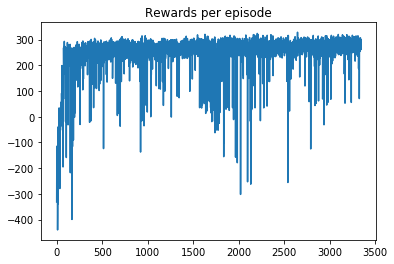

In [16]:
def plot(x, key=None, title='Rewards per episode', xlab='', ylab='', multi=False, save=True):
    if multi:
        for _ in x:
            plt.plot(_)
    else:
        plt.plot(x)
    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    if key is not None:
        plt.legend(key)
    
    plt.show()
    plt.close()
    
plot(history.history['episode_reward'])

In [18]:
# burn off the remaning steps of the episode
done = False
while not done:
    _,_,done,_ = env.step(0)

In [19]:
# evaluate the algorithm for 100 episodes.
test_history = dqn.test(env, nb_episodes=100, visualize=True)

Testing for 100 episodes ...
Episode 1: reward: 267.952, steps: 191
Episode 2: reward: 286.746, steps: 162
Episode 3: reward: 293.295, steps: 228
Episode 4: reward: 289.737, steps: 230
Episode 5: reward: 271.854, steps: 228
Episode 6: reward: 292.092, steps: 234
Episode 7: reward: 263.910, steps: 215
Episode 8: reward: 287.509, steps: 203
Episode 9: reward: 307.683, steps: 246
Episode 10: reward: 306.623, steps: 210
Episode 11: reward: 279.224, steps: 193
Episode 12: reward: 280.639, steps: 195
Episode 13: reward: 284.868, steps: 199
Episode 14: reward: 266.791, steps: 198
Episode 15: reward: 282.401, steps: 221
Episode 16: reward: 259.231, steps: 212
Episode 17: reward: 314.481, steps: 232
Episode 18: reward: 278.260, steps: 192
Episode 19: reward: 308.657, steps: 228
Episode 20: reward: 152.255, steps: 1000
Episode 21: reward: 270.808, steps: 201
Episode 22: reward: 258.219, steps: 211
Episode 23: reward: 277.087, steps: 217
Episode 24: reward: 302.931, steps: 163
Episode 25: reward:

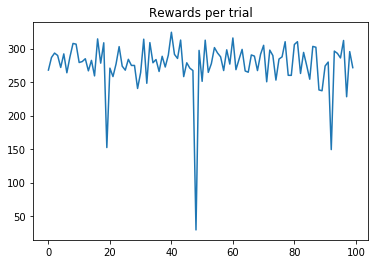

In [22]:
plot(test_history.history['episode_reward'],  title='Rewards per trial')

In [21]:
env.close()